In [1]:
import pandas as pd
import numpy as np

In [2]:
# ----------------------- GAS REGULAR ---------------
path1 = 'Gas_Nacional_Regular_Inegi.csv'
df_inegi_gas_regular = pd.read_csv(path1, index_col=0, sep=',') 

In [3]:
# ----------------------- GAS PREMIUM ---------------
path2 = 'Gas_Nacional_Premium_Inegi.csv'
df_inegi_gas_premium = pd.read_csv(path2, index_col=0, sep=',') 

In [4]:
# ----------------------- DIESEL ---------------
path3 = 'Gas_Nacional_Diesel_Inegi.csv'
df_inegi_gas_diesel = pd.read_csv(path3, index_col=0, sep=',') 

In [5]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
#!pip install --upgrade geopandas plotly
import geopandas as gpd
import plotly.express as px
import folium
from shapely.geometry import Point
from shapely.geometry import shape
from shapely.geometry import Polygon
import contextily as cx
from geopandas.tools import sjoin

In [6]:
# ---------------------- GEOPANDAS MEXICO -------------
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [7]:
states = gpd.read_file('mapa_mexico/Division_Municipal_Mexico_2010.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

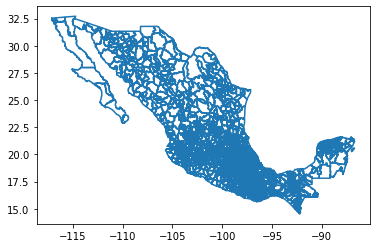

In [8]:
states.boundary.plot()

In [9]:
#------------------------- STATES LOCATION------------------------
df_states_location = states.loc[:, ['Area','geometry']]
df_states_location
#-----------------------------------GAS REGULAR--LOCATION -------------
#df_gas_inegi_regular_final_location = pd.merge(df_inegi_coneval_gas_regular, df_states_location)
#df_gas_inegi_regular_final_location
#------------------------- FIN LOCATION------------------------

,Area,geometry
0,1122.661145,"POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
1,3670.991923,"POLYGON ((-116.73791 32.56703, -116.65926 32.5..."
2,13119.275713,"POLYGON ((-115.81505 32.64088, -115.70466 32.6..."
3,517.120801,"POLYGON ((-117.06254 32.34436, -117.06276 32.3..."
4,9033.770278,"POLYGON ((-114.96166 32.36465, -114.96239 32.3..."
...,...,...
2475,233.070389,"POLYGON ((-92.15077 14.72499, -92.15014 14.723..."
2476,303.371304,"POLYGON ((-96.75636 16.72003, -96.75270 16.719..."
2477,7.201493,"POLYGON ((-96.74966 16.56239, -96.74989 16.562..."
2478,31.195331,"POLYGON ((-96.78255 16.59149, -96.79727 16.605..."


In [10]:
# -------------------------- CONEVAL ----------------------------
path4 = 'https://raw.githubusercontent.com/Arkadium98/Gasolina-CDMX/main/db_coneval/indicadores%20de%20pobreza%20municipal%2C%202015.csv'
df_coneval = pd.read_csv(path4, index_col=0, sep=',', encoding='latin-1')
df_coneval.reset_index(inplace=True)
df_coneval.head()

,clave_entidad,entidad_federativa,clave_municipio,municipio,poblacion,pobreza,pobreza_pob,pobreza_e,pobreza_e_pob,pobreza_m,...,ic_ali,ic_ali_pob,carencias,carencias_pob,carencias3,carencias3_pob,plb,plb_pob,plbm,plbm_pob
0,1,Aguascalientes,1001,Aguascalientes,"861,446",26.1,"224,949",1.6,"13,650",24.5,...,18,"154,658",52.6,"452,753",7.3,"63,220",37.6,"323,590",10,"86,166"
1,1,Aguascalientes,1002,Asientos,"46,624",54,"25,169",4.4,"2,067",49.5,...,24.7,"11,494",83,"38,713",14.1,"6,594",61.7,"28,745",24.4,"11,394"
2,1,Aguascalientes,1003,Calvillo,"52,773",56.8,"29,951",3.1,"1,650",53.6,...,17.3,"9,148",84.3,"44,513",10.5,"5,528",63.1,"33,299",26.8,"14,118"
3,1,Aguascalientes,1004,Cosío,"15,321",43.2,"6,620",2.8,432,40.4,...,20.7,"3,175",75.9,"11,623",9.9,"1,522",51.2,"7,852",16.6,"2,546"
4,1,Aguascalientes,1005,Jesús María,"125,750",25,"31,479",1.7,"2,095",23.4,...,18.7,"23,562",63.1,"79,310",11.3,"14,225",31.6,"39,794",7.9,"9,984"


In [11]:
df_coneval_poverty = df_coneval.loc[:, ['entidad_federativa','municipio', 'pobreza','vul_car','ic_rezedu','ic_asalud','ic_segsoc','ic_cv','ic_sbv','pobreza_e']]
df_coneval_poverty.rename(columns = {'entidad_federativa':'NOMEDO', 'municipio':'NOM_MUN'}, inplace = True)
df_coneval_poverty.head()

,NOMEDO,NOM_MUN,pobreza,vul_car,ic_rezedu,ic_asalud,ic_segsoc,ic_cv,ic_sbv,pobreza_e
0,Aguascalientes,Aguascalientes,26.1,26.4,11.7,15.1,36.4,3.7,3,1.6
1,Aguascalientes,Asientos,54,29,19.8,6,69,7.8,16.2,4.4
2,Aguascalientes,Calvillo,56.8,27.6,23.2,9.9,73.6,5.2,7.7,3.1
3,Aguascalientes,Cosío,43.2,32.7,14.7,5.5,62.7,7.9,7.6,2.8
4,Aguascalientes,Jesús María,25,38,17.3,15.2,45,8.2,6.3,1.7


In [12]:
# -------------------------------- Eliminar valores n.d -------------------------
df_coneval_poverty = df_coneval_poverty.drop(df_coneval_poverty[df_coneval_poverty.pobreza == 'n.d'].index)

In [13]:
df_coneval_poverty = df_coneval_poverty.astype({'pobreza': 'float64', 'vul_car': 'float64', 'ic_rezedu': 'float64', 'ic_asalud': 'float64','ic_segsoc': 'float64', 'ic_cv': 'float64', 'ic_sbv': 'float64', 'pobreza_e': 'float64'})
df_coneval_poverty.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 2456
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NOMEDO     2446 non-null   object 
 1   NOM_MUN    2446 non-null   object 
 2   pobreza    2446 non-null   float64
 3   vul_car    2446 non-null   float64
 4   ic_rezedu  2446 non-null   float64
 5   ic_asalud  2446 non-null   float64
 6   ic_segsoc  2446 non-null   float64
 7   ic_cv      2446 non-null   float64
 8   ic_sbv     2446 non-null   float64
 9   pobreza_e  2446 non-null   float64
dtypes: float64(8), object(2)
memory usage: 210.2+ KB


In [14]:
# -------------------------------- Sustituir nombres de Estados -------------------------
df_coneval_poverty.loc[df_coneval_poverty.NOMEDO == 'Distrito Federal', 'NOMEDO'] = 'Ciudad de México'
#-------------------------------------- FIN CONEVAL ------------------------

In [15]:
# -------------------------------- Editar GAS REGULAR --------------
# -------------------------------- Sustituir nombres de Estados -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOMEDO == 'D.F.', 'NOMEDO'] = 'Ciudad de México'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOMEDO == 'Mexico', 'NOMEDO'] = 'México'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOMEDO == 'Michoacan', 'NOMEDO'] = 'Michoacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOMEDO == 'Nuevo Leon', 'NOMEDO'] = 'Nuevo León'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOMEDO == 'Queretaro', 'NOMEDO'] = 'Querétaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOMEDO == 'San Luis Potosi', 'NOMEDO'] = 'San Luis Potosí'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOMEDO == 'Yucatan', 'NOMEDO'] = 'Yucatán'
# ----------------------------------------------------------------------------------

In [16]:
df_inegi_gas_regular.groupby('NOMEDO').mean()

,place_id,Area,ENTIDAD,MUN,LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,...,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC,x,y,gas_price
NOMEDO,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,12456.849398,921.205461,1.020213,2.830731,1009.650602,1244.473567,636.150215,604.530938,59.559017,29.380080,...,100.893365,70.450336,4.525280,10.337754,101.023518,1.082626,1.316656,-102.296196,21.924526,21.214036
Baja California,8972.765845,14378.164461,2.000000,2.925583,2292.158451,2052.833574,1017.478848,1032.638616,80.964598,39.879422,...,218.586382,122.546278,18.649962,19.113924,139.499482,4.299933,1.174722,-116.237835,32.349058,20.386144
Baja California Sur,10252.712766,15306.248445,3.000000,2.936897,1756.531915,239.837271,118.726648,118.315084,9.047099,4.490659,...,23.196212,12.929396,2.981021,2.306166,20.602339,0.601327,1.061703,-110.697361,24.420714,21.465957
Campeche,14542.619565,5231.035084,4.008158,4.137032,1275.945652,789.120348,405.202114,380.863093,34.691584,17.150401,...,44.107317,19.985186,12.658492,20.417190,87.785747,5.360896,1.331893,-90.834443,19.249426,22.438913
Chiapas,9892.484211,976.141872,7.009665,70.562488,462.722807,1579.016460,824.017866,752.889542,76.775434,37.725044,...,65.938969,32.782138,19.762558,30.089018,177.484222,7.113862,1.373139,-92.761964,16.264114,21.117754
Chihuahua,9319.708929,5149.143011,8.000984,29.038302,719.548214,4209.044846,2109.303177,2096.557756,171.907599,84.093466,...,352.817094,225.207986,21.048328,42.285082,391.368427,5.385459,1.142429,-106.377750,29.542314,19.890268
Ciudad de México,7527.438172,76.482060,9.000000,10.268262,41.456989,537980.495899,281194.959074,256785.307536,15203.959776,7476.520750,...,62825.209760,36193.398148,2845.108693,4365.991862,31339.822087,584.610119,9.890690,-99.140025,19.392542,22.075027
Coahuila,8580.136471,3266.806833,5.007635,25.059113,345.364706,5126.387394,2610.685733,2512.517970,245.554591,120.480045,...,395.935453,246.023172,21.938816,64.900316,473.209785,6.883480,1.428366,-101.837070,26.361460,21.121718
Colima,9298.942308,778.402774,6.000000,5.592990,309.653846,1243.494295,634.299865,606.279389,48.337040,23.724113,...,96.745663,49.918674,12.692388,14.977911,109.179528,2.984638,1.278953,-103.916313,19.196081,21.130000


In [86]:
# -------------------------------- Editar GAS REGULAR  MUNICIPIOS --------------
# -------------------------------- Sustituir nombres de Aguascalientes -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cosio', 'NOM_MUN'] = 'Cosío'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jesus Maria', 'NOM_MUN'] = 'Jesús María'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Rincon de Romos', 'NOM_MUN'] = 'Rincón de Romos'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Jose de Gracia', 'NOM_MUN'] = 'San José de Gracia'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepezal', 'NOM_MUN'] = 'Tepezalá'
# -------------------------------- Sustituir nombres de Baja California Sur -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Comondu', 'NOM_MUN'] = 'Comondú'
# -------------------------------- Sustituir nombres de Campeche -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Calkini', 'NOM_MUN'] = 'Calkiní'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Escarcega', 'NOM_MUN'] = 'Escárcega'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Hecelchakan', 'NOM_MUN'] = 'Hecelchakán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Hopelchan', 'NOM_MUN'] = 'Hopelchén'
# -------------------------------- Sustituir nombres de Chiapas -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Benemerito de las Americas', 'NOM_MUN'] = 'Benemérito de las Américas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Berriozabal', 'NOM_MUN'] = 'Berriozábal'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cacahoatan', 'NOM_MUN'] = 'Cacahoatán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Catazaj', 'NOM_MUN'] = 'Catazajá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Chicoasen', 'NOM_MUN'] = 'Chicoasén'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Chilon', 'NOM_MUN'] = 'Chilón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Comitan de Dominguez', 'NOM_MUN'] = 'Comitán de Domínguez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Copainal', 'NOM_MUN'] = 'Copainalá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huehuetan', 'NOM_MUN'] = 'Huehuetán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huitiupan', 'NOM_MUN'] = 'Huitiupán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huixtan', 'NOM_MUN'] = 'Huixtán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixhuatan', 'NOM_MUN'] = 'Ixhuatán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Cristabal de las Casas', 'NOM_MUN'] = 'San Cristóbal de las Casas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tecpatan', 'NOM_MUN'] = 'Tecpatán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tonal', 'NOM_MUN'] = 'Tonalá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tuxtla Gutierrez', 'NOM_MUN'] = 'Tuxtla Gutiérrez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Yajalon', 'NOM_MUN'] = 'Yajalón'
# -------------------------------- Sustituir nombres de Chihuahua -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Aquiles Serdan', 'NOM_MUN'] = 'Aquiles Serdán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ascension', 'NOM_MUN'] = 'Ascensión'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Bachiniva', 'NOM_MUN'] = 'Bachíniva'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Chinipas', 'NOM_MUN'] = 'Chínipas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Dr. Belisario Dominguez', 'NOM_MUN'] = 'Dr. Belisario Domínguez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Gomez Farias', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jimenez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Lopez', 'NOM_MUN'] = 'López'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Matachi', 'NOM_MUN'] = 'Matachí'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Barbara', 'NOM_MUN'] = 'Santa Bárbara'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Satevo', 'NOM_MUN'] = 'Satevó'
# -------------------------------- Sustituir nombres de Ciudad de México -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Alvaro Obregon', 'NOM_MUN'] = 'Álvaro Obregón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Benito Juarez', 'NOM_MUN'] = 'Benito Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coyoacan', 'NOM_MUN'] = 'Coyoacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tlahuac', 'NOM_MUN'] = 'Tláhuac'
# -------------------------------- Sustituir nombres de Coahuila -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuatrocienegas', 'NOM_MUN'] = 'Cuatro Ciénegas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jimenez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Muzquiz', 'NOM_MUN'] = 'Múzquiz'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Torreon', 'NOM_MUN'] = 'Torreón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa Union', 'NOM_MUN'] = 'Villa Unión'
# -------------------------------- Sustituir nombres de Colima -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Armeria', 'NOM_MUN'] = 'Armería'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coquimatlan', 'NOM_MUN'] = 'Coquimatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtlahuacan', 'NOM_MUN'] = 'Ixtlahuacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Minatitlan', 'NOM_MUN'] = 'Minatitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa de Alvarez', 'NOM_MUN'] = 'Villa de Álvarez'
# -------------------------------- Sustituir nombres de Durango -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Canatlan', 'NOM_MUN'] = 'Canatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuencame', 'NOM_MUN'] = 'Cuencamé'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'General Simon Bolivar', 'NOM_MUN'] = 'General Simón Bolívar'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Inde', 'NOM_MUN'] = 'Indé'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mapimi', 'NOM_MUN'] = 'Mapimí'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Panuco de Coronado', 'NOM_MUN'] = 'Pánuco de Coronado'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Juan del Rio', 'NOM_MUN'] = 'San Juan del Río'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Suchil', 'NOM_MUN'] = 'Súchil'
# -------------------------------- Sustituir nombres de Guanajuato -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cueramaro', 'NOM_MUN'] = 'Cuerámaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Dolores Hidalgo', 'NOM_MUN'] = 'Dolores Hidalgo Cuna de la Independencia Nacional'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huanimaro', 'NOM_MUN'] = 'Huanímaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jerecuaro', 'NOM_MUN'] = 'Jerécuaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Leon', 'NOM_MUN'] = 'León'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Moroleon', 'NOM_MUN'] = 'Moroleón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Penjamo', 'NOM_MUN'] = 'Pénjamo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Purisima del Rincon', 'NOM_MUN'] = 'Purísima del Rincón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Jose Iturbide', 'NOM_MUN'] = 'San José Iturbide'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santiago Maravatio', 'NOM_MUN'] = 'Santiago Maravatío'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villagran', 'NOM_MUN'] = 'Villagrán'
# -------------------------------- Sustituir nombres de Guerrero -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Acapulco de Juarez', 'NOM_MUN'] = 'Acapulco de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ajuchitlan del Progreso', 'NOM_MUN'] = 'Ajuchitlán del Progreso'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Atenango del Rio', 'NOM_MUN'] = 'Atenango del Río'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Atoyac de Alvarez', 'NOM_MUN'] = 'Atoyac de Álvarez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Azoyu', 'NOM_MUN'] = 'Azoyú'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Chilapa de Alvarez', 'NOM_MUN'] = 'Chilapa de Álvarez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coahuayutla de Jose Maria', 'NOM_MUN'] = 'Coahuayutla de José María Izazaga'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coyuca de Benitez', 'NOM_MUN'] = 'Coyuca de Benítez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coyuca de Catalan', 'NOM_MUN'] = 'Coyuca de Catalán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cutzamala de Pinzon', 'NOM_MUN'] = 'Cutzamala de Pinzón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huamuxtitlan', 'NOM_MUN'] = 'Huamuxtitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'La Union de Isidoro Montes d', 'NOM_MUN'] = 'La Unión de Isidoro Montes de Oca'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Olinal', 'NOM_MUN'] = 'Olinalá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Petatlan', 'NOM_MUN'] = 'Petatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Luis Acatlan', 'NOM_MUN'] = 'San Luis Acatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Taxco de Alarcon', 'NOM_MUN'] = 'Taxco de Alarcón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Xochihuehuetlan', 'NOM_MUN'] = 'Xochihuehuetlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zirandaro', 'NOM_MUN'] = 'Zirándaro'
# -------------------------------- Sustituir nombres de Hidalgo -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Acatlan', 'NOM_MUN'] = 'Acatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Acaxochitlan', 'NOM_MUN'] = 'Acaxochitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Eloxochitlan', 'NOM_MUN'] = 'Eloxochitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Metztitlan', 'NOM_MUN'] = 'Metztitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mixquiahuala de Juarez', 'NOM_MUN'] = 'Mixquiahuala de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nopala de Villagran', 'NOM_MUN'] = 'Nopala de Villagrán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Omitlan de Juarez', 'NOM_MUN'] = 'Omitlán de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Agustin Tlaxiaca', 'NOM_MUN'] = 'San Agustín Tlaxiaca'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Felipe Orizatlan', 'NOM_MUN'] = 'San Felipe Orizatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santiago Tulantepec de Lugo', 'NOM_MUN'] = 'Santiago Tulantepec de Lugo Guerrero'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepeji del Rio de Ocampo', 'NOM_MUN'] = 'Tepeji del Río de Ocampo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepetitlan', 'NOM_MUN'] = 'Tepetitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zacualtip n de Angeles', 'NOM_MUN'] = 'Zacualtipán de Ángeles'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zimap n', 'NOM_MUN'] = 'Zimapán'
# -------------------------------- Sustituir nombres de Jalisco -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Acatlan de Juarez', 'NOM_MUN'] = 'Acatlán de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Amatitan', 'NOM_MUN'] = 'Amatitán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Autlan de Navarro', 'NOM_MUN'] = 'Autlán de Navarro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ayotlan', 'NOM_MUN'] = 'Ayotlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cañadas de Obregon', 'NOM_MUN'] = 'Cañadas de Obregón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Chiquilistlan', 'NOM_MUN'] = 'Chiquilistlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cihuatlan', 'NOM_MUN'] = 'Cihuatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Colotlan', 'NOM_MUN'] = 'Colotlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Concepcion de Buenos Aires', 'NOM_MUN'] = 'Concepción de Buenos Aires'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuautitlan de Garcia Barrag', 'NOM_MUN'] = 'Cuautitlán de García Barragán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuqu¡o', 'NOM_MUN'] = 'Cuquío'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Encarnacion de Diaz', 'NOM_MUN'] = 'Encarnación de Díaz'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Etzatlan', 'NOM_MUN'] = 'Etzatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Gomez Farias', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huejucar', 'NOM_MUN'] = 'Huejúcar'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtlahuacan de los Membrillo', 'NOM_MUN'] = 'Ixtlahuacán de los Membrillos'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtlahuacan del Rio', 'NOM_MUN'] = 'Ixtlahuacán del Río'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jalostotitlan', 'NOM_MUN'] = 'Jalostotitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jesus Maria', 'NOM_MUN'] = 'Jesús María'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jilotlan de los Dolores', 'NOM_MUN'] = 'Jilotlán de los Dolores'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Juanacatlan', 'NOM_MUN'] = 'Juanacatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mexticacan', 'NOM_MUN'] = 'Mexticacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mixtlan', 'NOM_MUN'] = 'Mixtlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ocotlan', 'NOM_MUN'] = 'Ocotlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Poncitlan', 'NOM_MUN'] = 'Poncitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Diego de Alejandria', 'NOM_MUN'] = 'San Diego de Alejandría'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Julian', 'NOM_MUN'] = 'San Julián'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Martin de Bolaños', 'NOM_MUN'] = 'San Martín de Bolaños'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Martin de Hidalgo', 'NOM_MUN'] = 'San Martín Hidalgo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Sebastian del Oeste', 'NOM_MUN'] = 'San Sebastián del Oeste'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria de los Angeles', 'NOM_MUN'] = 'Santa María de los Ángeles'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tecalitlan', 'NOM_MUN'] = 'Tecalitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tecolotlan', 'NOM_MUN'] = 'Tecolotlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tenamaxtlan', 'NOM_MUN'] = 'Tenamaxtlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Teocuitatlan de Corona', 'NOM_MUN'] = 'Teocuitatlán de Corona'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepatitlan de Morelos', 'NOM_MUN'] = 'Tepatitlán de Morelos'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Teuchitlan', 'NOM_MUN'] = 'Teuchitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tizapan el Alto', 'NOM_MUN'] = 'Tizapán el Alto'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tlajomulco de Zuñiga', 'NOM_MUN'] = 'Tlajomulco de Zúñiga'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Toliman', 'NOM_MUN'] = 'Tolimán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tomatlan', 'NOM_MUN'] = 'Tomatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tonal', 'NOM_MUN'] = 'Tonalá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tototlan', 'NOM_MUN'] = 'Tototlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Union de San Antonio', 'NOM_MUN'] = 'Unión de San Antonio'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Valle de Juarez', 'NOM_MUN'] = 'Valle de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa Purificacion', 'NOM_MUN'] = 'Villa Purificación'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Yahualica de Gonzalez Gallo', 'NOM_MUN'] = 'Yahualica de González Gallo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zapotitlan de Vadillo', 'NOM_MUN'] = 'Zapotitlán de Vadillo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zapotlan del Rey', 'NOM_MUN'] = 'Zapotlán del Rey'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zapotlan el Grande', 'NOM_MUN'] = 'Zapotlán el Grande'
# -------------------------------- Sustituir nombres de Michoacán -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cheran', 'NOM_MUN'] = 'Cherán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coalcoman de Vazquez Pallare', 'NOM_MUN'] = 'Coalcomán de Vázquez Pallares'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cojumatlan de Regules', 'NOM_MUN'] = 'Cojumatlán de Régules'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Copandaro', 'NOM_MUN'] = 'Copándaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Erongaricuaro', 'NOM_MUN'] = 'Erongarícuaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtlan', 'NOM_MUN'] = 'Ixtlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jiminez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Lazaro Cardenas', 'NOM_MUN'] = 'Lázaro Cárdenas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Maravatio', 'NOM_MUN'] = 'Maravatío'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mugica', 'NOM_MUN'] = 'Múgica'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nocupetaro', 'NOM_MUN'] = 'Nocupétaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Numaran', 'NOM_MUN'] = 'Numarán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Pajacuaran', 'NOM_MUN'] = 'Pajacuarán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Panindicuaro', 'NOM_MUN'] = 'Panindícuaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Paracuaro', 'NOM_MUN'] = 'Parácuaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Periban', 'NOM_MUN'] = 'Peribán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Purepero', 'NOM_MUN'] = 'Purépero'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Puruandiro', 'NOM_MUN'] = 'Puruándiro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Querendaro', 'NOM_MUN'] = 'Queréndaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tacambaro', 'NOM_MUN'] = 'Tacámbaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tancitaro', 'NOM_MUN'] = 'Tancítaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tangancicuaro', 'NOM_MUN'] = 'Tangancícuaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tarimbaro', 'NOM_MUN'] = 'Tarímbaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tinguindin', 'NOM_MUN'] = 'Tingüindín'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tiquicheo de Nicolas Romero', 'NOM_MUN'] = 'Tiquicheo de Nicolás Romero'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tumbiscatio', 'NOM_MUN'] = 'Tumbiscatío'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Yurecuaro', 'NOM_MUN'] = 'Yurécuaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zinapecuaro', 'NOM_MUN'] = 'Zinapécuaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zitacuaro', 'NOM_MUN'] = 'Zitácuaro'
# -------------------------------- Sustituir nombres de Morelos -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coatlan del Rio', 'NOM_MUN'] = 'Coatlán del Río'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Miacatlan', 'NOM_MUN'] = 'Miacatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tetela del Volcan', 'NOM_MUN'] = 'Tetela del Volcán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tlaltizapan', 'NOM_MUN'] = 'Tlaltizapán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zacatepec de Hidalgo', 'NOM_MUN'] = 'Zacatepec'
# -------------------------------- Sustituir nombres de México -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Almoloya de Juarez', 'NOM_MUN'] = 'Almoloya de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Atizapan', 'NOM_MUN'] = 'Atizapán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Chimalhuacan', 'NOM_MUN'] = 'Chimalhuacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coacalco de Berriozabal', 'NOM_MUN'] = 'Coacalco de Berriozábal'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cocotitlan', 'NOM_MUN'] = 'Cocotitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuautitlan Izcalli', 'NOM_MUN'] = 'Cuautitlán Izcalli'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jocotitlan', 'NOM_MUN'] = 'Jocotitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Naucalpan de Juarez', 'NOM_MUN'] = 'Naucalpan de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nezahualcoyotl', 'NOM_MUN'] = 'Nezahualcóyotl'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Polotitlan', 'NOM_MUN'] = 'Polotitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Rayon', 'NOM_MUN'] = 'Rayón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Martin de las Piramides', 'NOM_MUN'] = 'San Martín de las Pirámides'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Soyaniquilpan de Juarez', 'NOM_MUN'] = 'Soyaniquilpan de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tec mac', 'NOM_MUN'] = 'Tecámac'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Teotihuacan', 'NOM_MUN'] = 'Teotihuacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepotzotlan', 'NOM_MUN'] = 'Tepotzotlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Texcaltitlan', 'NOM_MUN'] = 'Texcaltitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tultitlan', 'NOM_MUN'] = 'Tultitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa del Carbon', 'NOM_MUN'] = 'Villa del Carbón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Xonacatlan', 'NOM_MUN'] = 'Xonacatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zumpahuacan', 'NOM_MUN'] = 'Zumpahuacán'
# -------------------------------- Sustituir nombres de Nayarit -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ahuacatlan', 'NOM_MUN'] = 'Ahuacatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Amatlan de Cañas', 'NOM_MUN'] = 'Amatlán de Cañas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Bahia de Banderas', 'NOM_MUN'] = 'Bahía de Banderas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtlan del Rio', 'NOM_MUN'] = 'Ixtlán del Río'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ruiz', 'NOM_MUN'] = 'Ruíz'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria del Oro', 'NOM_MUN'] = 'Santa María del Oro'
# -------------------------------- Sustituir nombres de Nuevo León -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Anahuac', 'NOM_MUN'] = 'Anáhuac'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cadereyta Jimenez', 'NOM_MUN'] = 'Cadereyta Jiménez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cienega de Flores', 'NOM_MUN'] = 'Ciénega de Flores'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Doctor Arroyo', 'NOM_MUN'] = 'Dr. Arroyo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Garcia', 'NOM_MUN'] = 'García'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'General Escobedo', 'NOM_MUN'] = 'Gral. Escobedo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'General Teran', 'NOM_MUN'] = 'Gral. Terán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'General Zuazua', 'NOM_MUN'] = 'Gral. Zuazua'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Paras', 'NOM_MUN'] = 'Parás'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Pesqueria', 'NOM_MUN'] = 'Pesquería'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Nicolas de los Garza', 'NOM_MUN'] = 'San Nicolás de los Garza'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Pedro Garza Garcia', 'NOM_MUN'] = 'San Pedro Garza García'
# -------------------------------- Sustituir nombres de Oaxaca -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Acatlan de Perez Figueroa', 'NOM_MUN'] = 'Acatlán de Pérez Figueroa'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Asuncion Ixtaltepec', 'NOM_MUN'] = 'Asunción Cacalotepec'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Asuncion Nochixtlan', 'NOM_MUN'] = 'Asunción Nochixtlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuilapam de Guerrero', 'NOM_MUN'] = 'Cuilápam de Guerrero'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Heroica Ciudad de Huajuapan', 'NOM_MUN'] = 'Heroica Ciudad de Huajuapan de León'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtlan de Juarez', 'NOM_MUN'] = 'Ixtlán de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mariscala de Juarez', 'NOM_MUN'] = 'Mariscala de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Oaxaca de Juarez', 'NOM_MUN'] = 'Oaxaca de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Andres Huaxpaltepec', 'NOM_MUN'] = 'San Andrés Huaxpaltepec'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Antonino Castillo Velasc', 'NOM_MUN'] = 'San Antonino Castillo Velasco'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Cristobal Amatlan', 'NOM_MUN'] = 'San Cristóbal Amatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Felipe Jalapa de Diaz', 'NOM_MUN'] = 'San Felipe Jalapa de Díaz'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Francisco Lachigolo', 'NOM_MUN'] = 'San Francisco Lachigoló'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Jose Chiltepec', 'NOM_MUN'] = 'San José Chiltepec'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Juan Bautista Valle Naci', 'NOM_MUN'] = 'San Juan Bautista Valle Nacional'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Juan Cotzocon', 'NOM_MUN'] = 'San Juan Cotzocón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Lucas Ojitlan', 'NOM_MUN'] = 'San Lucas Ojitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Pedro Apostol', 'NOM_MUN'] = 'San Pedro Apóstol'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Pedro Coxcaltepec Cantar', 'NOM_MUN'] = 'San Pedro Coxcaltepec Cántaros'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Pedro Jicayan', 'NOM_MUN'] = 'San Pedro Jicayán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Pedro Mixtepec - Distr.', 'NOM_MUN'] = 'San Pedro Mixtepec -Dto. 26 -'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Pedro Totolapa', 'NOM_MUN'] = 'San Pedro Totolápam'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Pedro y San Pablo Teposc', 'NOM_MUN'] = 'San Pedro y San Pablo Teposcolula'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Sebastian Tecomaxtlahuac', 'NOM_MUN'] = 'San Sebastián Tecomaxtlahuaca'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Sebastian Tutla', 'NOM_MUN'] = 'San Sebastián Tutla'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Cruz Xoxocotlan', 'NOM_MUN'] = 'Santa Cruz Xoxocotlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Lucia del Camino', 'NOM_MUN'] = 'Santa Lucía del Camino'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria Atzompa', 'NOM_MUN'] = 'Santa María Atzompa'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria Huatulco', 'NOM_MUN'] = 'Santa María Huatulco'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria Petapa', 'NOM_MUN'] = 'Santa María Petapa'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria Tonameca', 'NOM_MUN'] = 'Santa María Tonameca'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria Zacatepec', 'NOM_MUN'] = 'Santa María Zacatepec'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria del Tule', 'NOM_MUN'] = 'Santa María del Tule'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santiago Xiacu¡', 'NOM_MUN'] = 'Santiago Xiacuí'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santo Domingo Tonal', 'NOM_MUN'] = 'Santo Domingo Tonalá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santo Tomas Ocotepec', 'NOM_MUN'] = 'Santo Tomás Ocotepec'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Teotitlan de Flores Mag¢n', 'NOM_MUN'] = 'Teotitlán de Flores Magón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Union Hidalgo', 'NOM_MUN'] = 'Unión Hidalgo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa Tejupam de la Union', 'NOM_MUN'] = 'Villa Tejúpam de la Unión'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa de Chilapa de Diaz', 'NOM_MUN'] = 'Villa de Chilapa de Díaz'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa de Tututepec de Melcho', 'NOM_MUN'] = 'Villa de Tututepec de Melchor Ocampo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zapotitlan Lagunas', 'NOM_MUN'] = 'Zapotitlán Lagunas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zimatlan de Alvarez', 'NOM_MUN'] = 'Zimatlán de Álvarez'
# -------------------------------- Sustituir nombres de Puebla -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Acatlan', 'NOM_MUN'] = 'Acatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ahuacatlan', 'NOM_MUN'] = 'Ahuacatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Coxcatlan', 'NOM_MUN'] = 'Coxcatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuautinchan', 'NOM_MUN'] = 'Cuautinchán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Epatlan', 'NOM_MUN'] = 'Epatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'General Felipe Angeles', 'NOM_MUN'] = 'General Felipe Ángeles'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huitzilan de Serdan', 'NOM_MUN'] = 'Huitzilan de Serdán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtacamaxtitlan', 'NOM_MUN'] = 'Ixtacamaxtitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Izucar de Matamoros', 'NOM_MUN'] = 'Izúcar de Matamoros'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Los Reyes de Juarez', 'NOM_MUN'] = 'Los Reyes de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mazapiltepec de Juarez', 'NOM_MUN'] = 'Mazapiltepec de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Quimixtlan', 'NOM_MUN'] = 'Quimixtlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Andres Cholula', 'NOM_MUN'] = 'San Andrés Cholula'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Jose Chiapa', 'NOM_MUN'] = 'San José Chiapa'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Martin Texmelucan', 'NOM_MUN'] = 'San Martín Texmelucan'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Mat¡as Tlalancaleca', 'NOM_MUN'] = 'San Matías Tlalancaleca'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santiago Miahuatlan', 'NOM_MUN'] = 'Santiago Miahuatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santo Tomas Hueyotlipan', 'NOM_MUN'] = 'Santo Tomás Hueyotlipan'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tehuacan', 'NOM_MUN'] = 'Tehuacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepanco de Lopez', 'NOM_MUN'] = 'Tepanco de López'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepexi de Rodriguez', 'NOM_MUN'] = 'Tepexi de Rodríguez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Teziutlan', 'NOM_MUN'] = 'Teziutlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zacatlan', 'NOM_MUN'] = 'Zacatlán'
# -------------------------------- Sustituir nombres de Querétaro -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Colon', 'NOM_MUN'] = 'Colón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'El Marques', 'NOM_MUN'] = 'El Marqués'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Queretaro', 'NOM_MUN'] = 'Querétaro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Joaquin', 'NOM_MUN'] = 'San Joaquín'
# -------------------------------- Sustituir nombres de Quintana Roo -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jose Maria Morelos', 'NOM_MUN'] = 'José María Morelos'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Lazaro C rdenas', 'NOM_MUN'] = 'Lázaro Cárdenas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Othon P. Blanco', 'NOM_MUN'] = 'Othón P. Blanco'
# -------------------------------- Sustituir nombres de San Luis Potosí -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ciudad Fernandez', 'NOM_MUN'] = 'Ciudad Fernández'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ciudad del Maiz', 'NOM_MUN'] = 'Ciudad del Maíz'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Guadalcazar', 'NOM_MUN'] = 'Guadalcázar'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huehuetlan', 'NOM_MUN'] = 'Huehuetlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Luis Potosi', 'NOM_MUN'] = 'San Luis Potosí'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Martin Chalchicuautla', 'NOM_MUN'] = 'San Martín Chalchicuautla'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Nicolas Tolentino', 'NOM_MUN'] = 'San Nicolás Tolentino'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Santa Maria del Rio', 'NOM_MUN'] = 'Santa María del Río'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Soledad de Graciano Sanchez', 'NOM_MUN'] = 'Soledad de Graciano Sánchez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tamuin', 'NOM_MUN'] = 'Tamuín'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tancanhuitz de Santos', 'NOM_MUN'] = 'Tancanhuitz'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tanquian de Escobedo', 'NOM_MUN'] = 'Tanquián de Escobedo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa Juarez', 'NOM_MUN'] = 'Villa Juárez'
# -------------------------------- Sustituir nombres de Sinaloa -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cosal', 'NOM_MUN'] = 'Cosalá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Culiacan', 'NOM_MUN'] = 'Culiacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mazatlan', 'NOM_MUN'] = 'Mazatlán'
# -------------------------------- Sustituir nombres de Sonora -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Banamichi', 'NOM_MUN'] = 'Banámichi'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Benjamin Hill', 'NOM_MUN'] = 'Benjamín Hill'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Bacum', 'NOM_MUN'] = 'Bácum'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Carbo', 'NOM_MUN'] = 'Carbó'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Huasabas', 'NOM_MUN'] = 'Huásabas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nacori Chico', 'NOM_MUN'] = 'Nácori Chico'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nacozari de Garcia', 'NOM_MUN'] = 'Nacozari de García'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Ignacio Rio Muerto', 'NOM_MUN'] = 'San Ignacio Río Muerto'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Luis Rio Colorado', 'NOM_MUN'] = 'San Luis Río Colorado'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Yecora', 'NOM_MUN'] = 'Yécora'
# -------------------------------- Sustituir nombres de Tabasco -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Balancan', 'NOM_MUN'] = 'Balancán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cardenas', 'NOM_MUN'] = 'Cárdenas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cunduacan', 'NOM_MUN'] = 'Cunduacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jalpa de Mendez', 'NOM_MUN'] = 'Jalpa de Méndez'
# -------------------------------- Sustituir nombres de Tamaulipas -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Gomez Far¡as', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Gonzalez', 'NOM_MUN'] = 'González'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Guemez', 'NOM_MUN'] = 'Güémez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Gustavo Diaz Ordaz', 'NOM_MUN'] = 'Gustavo Díaz Ordaz'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mendez', 'NOM_MUN'] = 'Méndez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Miguel Aleman', 'NOM_MUN'] = 'Miguel Alemán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Rio Bravo', 'NOM_MUN'] = 'Río Bravo'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Xicotencatl', 'NOM_MUN'] = 'Xicoténcatl'
# -------------------------------- Sustituir nombres de Tlaxcala -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Apetatitlan de Antonio Carva', 'NOM_MUN'] = 'Apetatitlán de Antonio Carvajal'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtacuixtla de Mariano Matam', 'NOM_MUN'] = 'Ixtacuixtla de Mariano Matamoros'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nanacamilpa de Mariano Arist', 'NOM_MUN'] = 'Nanacamilpa de Mariano Arista'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nativitas', 'NOM_MUN'] = 'Natívitas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Papalotla de Xicohtencatl', 'NOM_MUN'] = 'Papalotla de Xicohténcatl'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Jeronimo Zacualpan', 'NOM_MUN'] = 'San Jerónimo Zacualpan'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Sanctorum de Lazaro Cardenas', 'NOM_MUN'] = 'Sanctórum de Lázaro Cárdenas'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepetitla de Lardiz bal', 'NOM_MUN'] = 'Tepetitla de Lardizábal'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Zitlaltepec de Trinidad', 'NOM_MUN'] = 'Ziltlaltépec de Trinidad Sánchez Santos'
# -------------------------------- Sustituir nombres de Veracruz -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Alto Lucero de Gutierrez Bar', 'NOM_MUN'] = 'Alto Lucero de Gutiérrez Barrios'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Amatitlan', 'NOM_MUN'] = 'Amatitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Amatlan de los Reyes', 'NOM_MUN'] = 'Amatlán de los Reyes'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cazones', 'NOM_MUN'] = 'Cazones de Herrera'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Chocaman', 'NOM_MUN'] = 'Chocamán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cosautl n de Carvajal', 'NOM_MUN'] = 'Cosautlán de Carvajal'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Cuitlahuac', 'NOM_MUN'] = 'Cuitláhuac'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Fortin', 'NOM_MUN'] = 'Fortín'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Gutierrez Zamora', 'NOM_MUN'] = 'Gutiérrez Zamora'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Hidalgotitlan', 'NOM_MUN'] = 'Hidalgotitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixhuatlan del Cafe', 'NOM_MUN'] = 'Ixhuatlán del Café'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixhuatlan del Sureste', 'NOM_MUN'] = 'Ixhuatlán del Sureste'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixhuatl n de Madero', 'NOM_MUN'] = 'Ixhuatlán de Madero'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ixtaczoquitlan', 'NOM_MUN'] = 'Ixtaczoquitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jesus Carranza', 'NOM_MUN'] = 'Jesús Carranza'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jaltipan', 'NOM_MUN'] = 'Jáltipan'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Jose Azueta', 'NOM_MUN'] = 'José Azueta'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Juan Rodriguez Clara', 'NOM_MUN'] = 'Juan Rodríguez Clara'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Las Vigas de Ramirez', 'NOM_MUN'] = 'Las Vigas de Ramírez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mart¡nez de la Torre', 'NOM_MUN'] = 'Martínez de la Torre'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Medell¡n', 'NOM_MUN'] = 'Medellín'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Moloacan', 'NOM_MUN'] = 'Moloacán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nanchital de Lazaro C rdenas', 'NOM_MUN'] = 'Nanchital de Lázaro Cárdenas del Río'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Naranjos Amatlan', 'NOM_MUN'] = 'Naranjos Amatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Platon S nchez', 'NOM_MUN'] = 'Platón Sánchez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'San Andres Tuxtla', 'NOM_MUN'] = 'San Andrés Tuxtla'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Sayula de Alem n', 'NOM_MUN'] = 'Sayula de Alemán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tamalin', 'NOM_MUN'] = 'Tamalín'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tatahuicapan de Juarez', 'NOM_MUN'] = 'Tatahuicapan de Juárez'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tihuatlan', 'NOM_MUN'] = 'Tihuatlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tlacotepec de Mejia', 'NOM_MUN'] = 'Tlacotepec de Mejía'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tuxpam', 'NOM_MUN'] = 'Tuxpan'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Ursulo Galvan', 'NOM_MUN'] = 'Ursulo Galván'
# -------------------------------- Sustituir nombres de Yucatán -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Celestun', 'NOM_MUN'] = 'Celestún'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Dzidzant£n', 'NOM_MUN'] = 'Dzidzantún'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Dzilam Gonz lez', 'NOM_MUN'] = 'Dzilam González'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Hocab', 'NOM_MUN'] = 'Hocabá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Hoctun', 'NOM_MUN'] = 'Hoctún'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Holocho', 'NOM_MUN'] = 'Halachó'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Hunucm', 'NOM_MUN'] = 'Hunucmá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Kanasin', 'NOM_MUN'] = 'Kanasín'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Kopom', 'NOM_MUN'] = 'Kopomá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Mani', 'NOM_MUN'] = 'Maní'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Maxcanu', 'NOM_MUN'] = 'Maxcanú'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Merida', 'NOM_MUN'] = 'Mérida'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Panab', 'NOM_MUN'] = 'Panabá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Rio Lagartos', 'NOM_MUN'] = 'Río Lagartos'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Sucil', 'NOM_MUN'] = 'Sucilá'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tekanto', 'NOM_MUN'] = 'Tekantó'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Temozon', 'NOM_MUN'] = 'Temozón'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tizimin', 'NOM_MUN'] = 'Tizimín'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Uman', 'NOM_MUN'] = 'Umán'
# -------------------------------- Sustituir nombres de Zacatecas -------------------------
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Concepcion del Oro', 'NOM_MUN'] = 'Concepción del Oro'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'General Francisco R. Murguia', 'NOM_MUN'] = 'General Francisco R. Murguía'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'General Panfilo Natera', 'NOM_MUN'] = 'General Pánfilo Natera'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Nochistlan de Mej¡a', 'NOM_MUN'] = 'Nochistlán de Mejía'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Panuco', 'NOM_MUN'] = 'Pánuco'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Rio Grande', 'NOM_MUN'] = 'Río Grande'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tepechitlan', 'NOM_MUN'] = 'Tepechitlán'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Teul de Gonzalez Ortega', 'NOM_MUN'] = 'Teúl de González Ortega'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Tlaltenango de Sanchez Roman', 'NOM_MUN'] = 'Tlaltenango de Sánchez Román'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Trinidad Garcia de la Cadena', 'NOM_MUN'] = 'Trinidad García de la Cadena'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Valpara¡so', 'NOM_MUN'] = 'Valparaíso'
df_inegi_gas_regular.loc[df_inegi_gas_regular.NOM_MUN == 'Villa Gonzalez Ortega', 'NOM_MUN'] = 'Villa González Ortega'
# ----------------------------------------------------------------------------------

In [93]:
df_ine = df_inegi_gas_regular[df_inegi_gas_regular.NOMEDO == 'Zacatecas']
df_ineg = df_ine.groupby('NOM_MUN').mean()
df_ineg.reset_index(inplace=True)
df_ineg = df_ineg.loc[:, ['NOM_MUN','place_id']] 
#df_ineg.head()

In [92]:
df_cone = df_coneval_poverty[df_coneval_poverty.NOMEDO == 'Zacatecas']
df_coni = df_cone.groupby('NOM_MUN').mean() 
#df_coni.head()

In [94]:
#-------------------------------- GAS REGUlAR INEGI CONEVAL ----------
df_inegi_coneval_gas_regular = pd.merge(df_inegi_gas_regular, df_coneval_poverty, how='inner') #11406 de 
#df_inegi_coneval_gas_regular

In [98]:
#-------------------------------- GUARDAR GAS REGUlAR INEGI CONEVAL ----------
df_inegi_coneval_gas_regular.to_csv("Gas_Regular_Nacional_Final.csv",encoding='latin-1')

In [102]:
path7 = 'Gas_Regular_Nacional_Final.csv'
df_gas_regular_nacional_mx = pd.read_csv(path7, index_col=0, sep=',', encoding='latin-1')
#df_gas_regular_nacional_mx.groupby('NOMEDO').mean()
#-------------------------------- FIN GAS REGUlAR INEGI CONEVAL ----------

In [109]:
# -------------------------------- Editar GAS PREMIUM --------------
# -------------------------------- Sustituir nombres de Estados -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOMEDO == 'D.F.', 'NOMEDO'] = 'Ciudad de México'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOMEDO == 'Mexico', 'NOMEDO'] = 'México'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOMEDO == 'Michoacan', 'NOMEDO'] = 'Michoacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOMEDO == 'Nuevo Leon', 'NOMEDO'] = 'Nuevo León'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOMEDO == 'Queretaro', 'NOMEDO'] = 'Querétaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOMEDO == 'San Luis Potosi', 'NOMEDO'] = 'San Luis Potosí'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOMEDO == 'Yucatan', 'NOMEDO'] = 'Yucatán'
# ----------------------------------------------------------------------------------

In [110]:
# -------------------------------- Editar GAS PREMIUM  MUNICIPIOS --------------
# -------------------------------- Sustituir nombres de Aguascalientes -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cosio', 'NOM_MUN'] = 'Cosío'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jesus Maria', 'NOM_MUN'] = 'Jesús María'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Rincon de Romos', 'NOM_MUN'] = 'Rincón de Romos'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Jose de Gracia', 'NOM_MUN'] = 'San José de Gracia'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepezal', 'NOM_MUN'] = 'Tepezalá'
# -------------------------------- Sustituir nombres de Baja California Sur -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Comondu', 'NOM_MUN'] = 'Comondú'
# -------------------------------- Sustituir nombres de Campeche -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Calkini', 'NOM_MUN'] = 'Calkiní'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Escarcega', 'NOM_MUN'] = 'Escárcega'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Hecelchakan', 'NOM_MUN'] = 'Hecelchakán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Hopelchan', 'NOM_MUN'] = 'Hopelchén'
# -------------------------------- Sustituir nombres de Chiapas -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Benemerito de las Americas', 'NOM_MUN'] = 'Benemérito de las Américas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Berriozabal', 'NOM_MUN'] = 'Berriozábal'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cacahoatan', 'NOM_MUN'] = 'Cacahoatán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Catazaj', 'NOM_MUN'] = 'Catazajá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Chicoasen', 'NOM_MUN'] = 'Chicoasén'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Chilon', 'NOM_MUN'] = 'Chilón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Comitan de Dominguez', 'NOM_MUN'] = 'Comitán de Domínguez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Copainal', 'NOM_MUN'] = 'Copainalá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huehuetan', 'NOM_MUN'] = 'Huehuetán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huitiupan', 'NOM_MUN'] = 'Huitiupán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huixtan', 'NOM_MUN'] = 'Huixtán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixhuatan', 'NOM_MUN'] = 'Ixhuatán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Cristabal de las Casas', 'NOM_MUN'] = 'San Cristóbal de las Casas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tecpatan', 'NOM_MUN'] = 'Tecpatán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tonal', 'NOM_MUN'] = 'Tonalá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tuxtla Gutierrez', 'NOM_MUN'] = 'Tuxtla Gutiérrez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Yajalon', 'NOM_MUN'] = 'Yajalón'
# -------------------------------- Sustituir nombres de Chihuahua -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Aquiles Serdan', 'NOM_MUN'] = 'Aquiles Serdán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ascension', 'NOM_MUN'] = 'Ascensión'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Bachiniva', 'NOM_MUN'] = 'Bachíniva'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Chinipas', 'NOM_MUN'] = 'Chínipas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Dr. Belisario Dominguez', 'NOM_MUN'] = 'Dr. Belisario Domínguez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Gomez Farias', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jimenez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Lopez', 'NOM_MUN'] = 'López'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Matachi', 'NOM_MUN'] = 'Matachí'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Barbara', 'NOM_MUN'] = 'Santa Bárbara'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Satevo', 'NOM_MUN'] = 'Satevó'
# -------------------------------- Sustituir nombres de Ciudad de México -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Alvaro Obregon', 'NOM_MUN'] = 'Álvaro Obregón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Benito Juarez', 'NOM_MUN'] = 'Benito Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coyoacan', 'NOM_MUN'] = 'Coyoacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tlahuac', 'NOM_MUN'] = 'Tláhuac'
# -------------------------------- Sustituir nombres de Coahuila -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuatrocienegas', 'NOM_MUN'] = 'Cuatro Ciénegas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jimenez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Muzquiz', 'NOM_MUN'] = 'Múzquiz'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Torreon', 'NOM_MUN'] = 'Torreón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa Union', 'NOM_MUN'] = 'Villa Unión'
# -------------------------------- Sustituir nombres de Colima -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Armeria', 'NOM_MUN'] = 'Armería'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coquimatlan', 'NOM_MUN'] = 'Coquimatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtlahuacan', 'NOM_MUN'] = 'Ixtlahuacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Minatitlan', 'NOM_MUN'] = 'Minatitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa de Alvarez', 'NOM_MUN'] = 'Villa de Álvarez'
# -------------------------------- Sustituir nombres de Durango -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Canatlan', 'NOM_MUN'] = 'Canatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuencame', 'NOM_MUN'] = 'Cuencamé'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'General Simon Bolivar', 'NOM_MUN'] = 'General Simón Bolívar'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Inde', 'NOM_MUN'] = 'Indé'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mapimi', 'NOM_MUN'] = 'Mapimí'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Panuco de Coronado', 'NOM_MUN'] = 'Pánuco de Coronado'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Juan del Rio', 'NOM_MUN'] = 'San Juan del Río'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Suchil', 'NOM_MUN'] = 'Súchil'
# -------------------------------- Sustituir nombres de Guanajuato -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cueramaro', 'NOM_MUN'] = 'Cuerámaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Dolores Hidalgo', 'NOM_MUN'] = 'Dolores Hidalgo Cuna de la Independencia Nacional'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huanimaro', 'NOM_MUN'] = 'Huanímaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jerecuaro', 'NOM_MUN'] = 'Jerécuaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Leon', 'NOM_MUN'] = 'León'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Moroleon', 'NOM_MUN'] = 'Moroleón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Penjamo', 'NOM_MUN'] = 'Pénjamo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Purisima del Rincon', 'NOM_MUN'] = 'Purísima del Rincón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Jose Iturbide', 'NOM_MUN'] = 'San José Iturbide'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santiago Maravatio', 'NOM_MUN'] = 'Santiago Maravatío'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villagran', 'NOM_MUN'] = 'Villagrán'
# -------------------------------- Sustituir nombres de Guerrero -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Acapulco de Juarez', 'NOM_MUN'] = 'Acapulco de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ajuchitlan del Progreso', 'NOM_MUN'] = 'Ajuchitlán del Progreso'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Atenango del Rio', 'NOM_MUN'] = 'Atenango del Río'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Atoyac de Alvarez', 'NOM_MUN'] = 'Atoyac de Álvarez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Azoyu', 'NOM_MUN'] = 'Azoyú'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Chilapa de Alvarez', 'NOM_MUN'] = 'Chilapa de Álvarez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coahuayutla de Jose Maria', 'NOM_MUN'] = 'Coahuayutla de José María Izazaga'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coyuca de Benitez', 'NOM_MUN'] = 'Coyuca de Benítez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coyuca de Catalan', 'NOM_MUN'] = 'Coyuca de Catalán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cutzamala de Pinzon', 'NOM_MUN'] = 'Cutzamala de Pinzón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huamuxtitlan', 'NOM_MUN'] = 'Huamuxtitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'La Union de Isidoro Montes d', 'NOM_MUN'] = 'La Unión de Isidoro Montes de Oca'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Olinal', 'NOM_MUN'] = 'Olinalá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Petatlan', 'NOM_MUN'] = 'Petatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Luis Acatlan', 'NOM_MUN'] = 'San Luis Acatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Taxco de Alarcon', 'NOM_MUN'] = 'Taxco de Alarcón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Xochihuehuetlan', 'NOM_MUN'] = 'Xochihuehuetlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zirandaro', 'NOM_MUN'] = 'Zirándaro'
# -------------------------------- Sustituir nombres de Hidalgo -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Acatlan', 'NOM_MUN'] = 'Acatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Acaxochitlan', 'NOM_MUN'] = 'Acaxochitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Eloxochitlan', 'NOM_MUN'] = 'Eloxochitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Metztitlan', 'NOM_MUN'] = 'Metztitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mixquiahuala de Juarez', 'NOM_MUN'] = 'Mixquiahuala de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nopala de Villagran', 'NOM_MUN'] = 'Nopala de Villagrán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Omitlan de Juarez', 'NOM_MUN'] = 'Omitlán de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Agustin Tlaxiaca', 'NOM_MUN'] = 'San Agustín Tlaxiaca'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Felipe Orizatlan', 'NOM_MUN'] = 'San Felipe Orizatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santiago Tulantepec de Lugo', 'NOM_MUN'] = 'Santiago Tulantepec de Lugo Guerrero'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepeji del Rio de Ocampo', 'NOM_MUN'] = 'Tepeji del Río de Ocampo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepetitlan', 'NOM_MUN'] = 'Tepetitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zacualtip n de Angeles', 'NOM_MUN'] = 'Zacualtipán de Ángeles'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zimap n', 'NOM_MUN'] = 'Zimapán'
# -------------------------------- Sustituir nombres de Jalisco -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Acatlan de Juarez', 'NOM_MUN'] = 'Acatlán de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Amatitan', 'NOM_MUN'] = 'Amatitán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Autlan de Navarro', 'NOM_MUN'] = 'Autlán de Navarro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ayotlan', 'NOM_MUN'] = 'Ayotlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cañadas de Obregon', 'NOM_MUN'] = 'Cañadas de Obregón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Chiquilistlan', 'NOM_MUN'] = 'Chiquilistlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cihuatlan', 'NOM_MUN'] = 'Cihuatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Colotlan', 'NOM_MUN'] = 'Colotlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Concepcion de Buenos Aires', 'NOM_MUN'] = 'Concepción de Buenos Aires'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuautitlan de Garcia Barrag', 'NOM_MUN'] = 'Cuautitlán de García Barragán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuqu¡o', 'NOM_MUN'] = 'Cuquío'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Encarnacion de Diaz', 'NOM_MUN'] = 'Encarnación de Díaz'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Etzatlan', 'NOM_MUN'] = 'Etzatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Gomez Farias', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huejucar', 'NOM_MUN'] = 'Huejúcar'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtlahuacan de los Membrillo', 'NOM_MUN'] = 'Ixtlahuacán de los Membrillos'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtlahuacan del Rio', 'NOM_MUN'] = 'Ixtlahuacán del Río'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jalostotitlan', 'NOM_MUN'] = 'Jalostotitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jesus Maria', 'NOM_MUN'] = 'Jesús María'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jilotlan de los Dolores', 'NOM_MUN'] = 'Jilotlán de los Dolores'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Juanacatlan', 'NOM_MUN'] = 'Juanacatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mexticacan', 'NOM_MUN'] = 'Mexticacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mixtlan', 'NOM_MUN'] = 'Mixtlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ocotlan', 'NOM_MUN'] = 'Ocotlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Poncitlan', 'NOM_MUN'] = 'Poncitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Diego de Alejandria', 'NOM_MUN'] = 'San Diego de Alejandría'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Julian', 'NOM_MUN'] = 'San Julián'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Martin de Bolaños', 'NOM_MUN'] = 'San Martín de Bolaños'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Martin de Hidalgo', 'NOM_MUN'] = 'San Martín Hidalgo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Sebastian del Oeste', 'NOM_MUN'] = 'San Sebastián del Oeste'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria de los Angeles', 'NOM_MUN'] = 'Santa María de los Ángeles'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tecalitlan', 'NOM_MUN'] = 'Tecalitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tecolotlan', 'NOM_MUN'] = 'Tecolotlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tenamaxtlan', 'NOM_MUN'] = 'Tenamaxtlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Teocuitatlan de Corona', 'NOM_MUN'] = 'Teocuitatlán de Corona'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepatitlan de Morelos', 'NOM_MUN'] = 'Tepatitlán de Morelos'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Teuchitlan', 'NOM_MUN'] = 'Teuchitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tizapan el Alto', 'NOM_MUN'] = 'Tizapán el Alto'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tlajomulco de Zuñiga', 'NOM_MUN'] = 'Tlajomulco de Zúñiga'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Toliman', 'NOM_MUN'] = 'Tolimán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tomatlan', 'NOM_MUN'] = 'Tomatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tonal', 'NOM_MUN'] = 'Tonalá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tototlan', 'NOM_MUN'] = 'Tototlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Union de San Antonio', 'NOM_MUN'] = 'Unión de San Antonio'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Valle de Juarez', 'NOM_MUN'] = 'Valle de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa Purificacion', 'NOM_MUN'] = 'Villa Purificación'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Yahualica de Gonzalez Gallo', 'NOM_MUN'] = 'Yahualica de González Gallo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zapotitlan de Vadillo', 'NOM_MUN'] = 'Zapotitlán de Vadillo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zapotlan del Rey', 'NOM_MUN'] = 'Zapotlán del Rey'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zapotlan el Grande', 'NOM_MUN'] = 'Zapotlán el Grande'
# -------------------------------- Sustituir nombres de Michoacán -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cheran', 'NOM_MUN'] = 'Cherán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coalcoman de Vazquez Pallare', 'NOM_MUN'] = 'Coalcomán de Vázquez Pallares'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cojumatlan de Regules', 'NOM_MUN'] = 'Cojumatlán de Régules'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Copandaro', 'NOM_MUN'] = 'Copándaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Erongaricuaro', 'NOM_MUN'] = 'Erongarícuaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtlan', 'NOM_MUN'] = 'Ixtlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jiminez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Lazaro Cardenas', 'NOM_MUN'] = 'Lázaro Cárdenas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Maravatio', 'NOM_MUN'] = 'Maravatío'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mugica', 'NOM_MUN'] = 'Múgica'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nocupetaro', 'NOM_MUN'] = 'Nocupétaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Numaran', 'NOM_MUN'] = 'Numarán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Pajacuaran', 'NOM_MUN'] = 'Pajacuarán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Panindicuaro', 'NOM_MUN'] = 'Panindícuaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Paracuaro', 'NOM_MUN'] = 'Parácuaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Periban', 'NOM_MUN'] = 'Peribán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Purepero', 'NOM_MUN'] = 'Purépero'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Puruandiro', 'NOM_MUN'] = 'Puruándiro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Querendaro', 'NOM_MUN'] = 'Queréndaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tacambaro', 'NOM_MUN'] = 'Tacámbaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tancitaro', 'NOM_MUN'] = 'Tancítaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tangancicuaro', 'NOM_MUN'] = 'Tangancícuaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tarimbaro', 'NOM_MUN'] = 'Tarímbaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tinguindin', 'NOM_MUN'] = 'Tingüindín'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tiquicheo de Nicolas Romero', 'NOM_MUN'] = 'Tiquicheo de Nicolás Romero'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tumbiscatio', 'NOM_MUN'] = 'Tumbiscatío'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Yurecuaro', 'NOM_MUN'] = 'Yurécuaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zinapecuaro', 'NOM_MUN'] = 'Zinapécuaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zitacuaro', 'NOM_MUN'] = 'Zitácuaro'
# -------------------------------- Sustituir nombres de Morelos -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coatlan del Rio', 'NOM_MUN'] = 'Coatlán del Río'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Miacatlan', 'NOM_MUN'] = 'Miacatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tetela del Volcan', 'NOM_MUN'] = 'Tetela del Volcán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tlaltizapan', 'NOM_MUN'] = 'Tlaltizapán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zacatepec de Hidalgo', 'NOM_MUN'] = 'Zacatepec'
# -------------------------------- Sustituir nombres de México -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Almoloya de Juarez', 'NOM_MUN'] = 'Almoloya de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Atizapan', 'NOM_MUN'] = 'Atizapán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Chimalhuacan', 'NOM_MUN'] = 'Chimalhuacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coacalco de Berriozabal', 'NOM_MUN'] = 'Coacalco de Berriozábal'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cocotitlan', 'NOM_MUN'] = 'Cocotitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuautitlan Izcalli', 'NOM_MUN'] = 'Cuautitlán Izcalli'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jocotitlan', 'NOM_MUN'] = 'Jocotitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Naucalpan de Juarez', 'NOM_MUN'] = 'Naucalpan de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nezahualcoyotl', 'NOM_MUN'] = 'Nezahualcóyotl'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Polotitlan', 'NOM_MUN'] = 'Polotitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Rayon', 'NOM_MUN'] = 'Rayón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Martin de las Piramides', 'NOM_MUN'] = 'San Martín de las Pirámides'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Soyaniquilpan de Juarez', 'NOM_MUN'] = 'Soyaniquilpan de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tec mac', 'NOM_MUN'] = 'Tecámac'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Teotihuacan', 'NOM_MUN'] = 'Teotihuacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepotzotlan', 'NOM_MUN'] = 'Tepotzotlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Texcaltitlan', 'NOM_MUN'] = 'Texcaltitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tultitlan', 'NOM_MUN'] = 'Tultitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa del Carbon', 'NOM_MUN'] = 'Villa del Carbón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Xonacatlan', 'NOM_MUN'] = 'Xonacatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zumpahuacan', 'NOM_MUN'] = 'Zumpahuacán'
# -------------------------------- Sustituir nombres de Nayarit -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ahuacatlan', 'NOM_MUN'] = 'Ahuacatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Amatlan de Cañas', 'NOM_MUN'] = 'Amatlán de Cañas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Bahia de Banderas', 'NOM_MUN'] = 'Bahía de Banderas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtlan del Rio', 'NOM_MUN'] = 'Ixtlán del Río'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ruiz', 'NOM_MUN'] = 'Ruíz'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria del Oro', 'NOM_MUN'] = 'Santa María del Oro'
# -------------------------------- Sustituir nombres de Nuevo León -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Anahuac', 'NOM_MUN'] = 'Anáhuac'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cadereyta Jimenez', 'NOM_MUN'] = 'Cadereyta Jiménez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cienega de Flores', 'NOM_MUN'] = 'Ciénega de Flores'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Doctor Arroyo', 'NOM_MUN'] = 'Dr. Arroyo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Garcia', 'NOM_MUN'] = 'García'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'General Escobedo', 'NOM_MUN'] = 'Gral. Escobedo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'General Teran', 'NOM_MUN'] = 'Gral. Terán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'General Zuazua', 'NOM_MUN'] = 'Gral. Zuazua'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Paras', 'NOM_MUN'] = 'Parás'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Pesqueria', 'NOM_MUN'] = 'Pesquería'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Nicolas de los Garza', 'NOM_MUN'] = 'San Nicolás de los Garza'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Pedro Garza Garcia', 'NOM_MUN'] = 'San Pedro Garza García'
# -------------------------------- Sustituir nombres de Oaxaca -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Acatlan de Perez Figueroa', 'NOM_MUN'] = 'Acatlán de Pérez Figueroa'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Asuncion Ixtaltepec', 'NOM_MUN'] = 'Asunción Cacalotepec'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Asuncion Nochixtlan', 'NOM_MUN'] = 'Asunción Nochixtlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuilapam de Guerrero', 'NOM_MUN'] = 'Cuilápam de Guerrero'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Heroica Ciudad de Huajuapan', 'NOM_MUN'] = 'Heroica Ciudad de Huajuapan de León'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtlan de Juarez', 'NOM_MUN'] = 'Ixtlán de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mariscala de Juarez', 'NOM_MUN'] = 'Mariscala de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Oaxaca de Juarez', 'NOM_MUN'] = 'Oaxaca de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Andres Huaxpaltepec', 'NOM_MUN'] = 'San Andrés Huaxpaltepec'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Antonino Castillo Velasc', 'NOM_MUN'] = 'San Antonino Castillo Velasco'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Cristobal Amatlan', 'NOM_MUN'] = 'San Cristóbal Amatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Felipe Jalapa de Diaz', 'NOM_MUN'] = 'San Felipe Jalapa de Díaz'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Francisco Lachigolo', 'NOM_MUN'] = 'San Francisco Lachigoló'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Jose Chiltepec', 'NOM_MUN'] = 'San José Chiltepec'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Juan Bautista Valle Naci', 'NOM_MUN'] = 'San Juan Bautista Valle Nacional'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Juan Cotzocon', 'NOM_MUN'] = 'San Juan Cotzocón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Lucas Ojitlan', 'NOM_MUN'] = 'San Lucas Ojitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Pedro Apostol', 'NOM_MUN'] = 'San Pedro Apóstol'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Pedro Coxcaltepec Cantar', 'NOM_MUN'] = 'San Pedro Coxcaltepec Cántaros'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Pedro Jicayan', 'NOM_MUN'] = 'San Pedro Jicayán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Pedro Mixtepec - Distr.', 'NOM_MUN'] = 'San Pedro Mixtepec -Dto. 26 -'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Pedro Totolapa', 'NOM_MUN'] = 'San Pedro Totolápam'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Pedro y San Pablo Teposc', 'NOM_MUN'] = 'San Pedro y San Pablo Teposcolula'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Sebastian Tecomaxtlahuac', 'NOM_MUN'] = 'San Sebastián Tecomaxtlahuaca'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Sebastian Tutla', 'NOM_MUN'] = 'San Sebastián Tutla'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Cruz Xoxocotlan', 'NOM_MUN'] = 'Santa Cruz Xoxocotlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Lucia del Camino', 'NOM_MUN'] = 'Santa Lucía del Camino'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria Atzompa', 'NOM_MUN'] = 'Santa María Atzompa'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria Huatulco', 'NOM_MUN'] = 'Santa María Huatulco'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria Petapa', 'NOM_MUN'] = 'Santa María Petapa'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria Tonameca', 'NOM_MUN'] = 'Santa María Tonameca'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria Zacatepec', 'NOM_MUN'] = 'Santa María Zacatepec'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria del Tule', 'NOM_MUN'] = 'Santa María del Tule'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santiago Xiacu¡', 'NOM_MUN'] = 'Santiago Xiacuí'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santo Domingo Tonal', 'NOM_MUN'] = 'Santo Domingo Tonalá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santo Tomas Ocotepec', 'NOM_MUN'] = 'Santo Tomás Ocotepec'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Teotitlan de Flores Mag¢n', 'NOM_MUN'] = 'Teotitlán de Flores Magón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Union Hidalgo', 'NOM_MUN'] = 'Unión Hidalgo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa Tejupam de la Union', 'NOM_MUN'] = 'Villa Tejúpam de la Unión'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa de Chilapa de Diaz', 'NOM_MUN'] = 'Villa de Chilapa de Díaz'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa de Tututepec de Melcho', 'NOM_MUN'] = 'Villa de Tututepec de Melchor Ocampo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zapotitlan Lagunas', 'NOM_MUN'] = 'Zapotitlán Lagunas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zimatlan de Alvarez', 'NOM_MUN'] = 'Zimatlán de Álvarez'
# -------------------------------- Sustituir nombres de Puebla -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Acatlan', 'NOM_MUN'] = 'Acatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ahuacatlan', 'NOM_MUN'] = 'Ahuacatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Coxcatlan', 'NOM_MUN'] = 'Coxcatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuautinchan', 'NOM_MUN'] = 'Cuautinchán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Epatlan', 'NOM_MUN'] = 'Epatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'General Felipe Angeles', 'NOM_MUN'] = 'General Felipe Ángeles'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huitzilan de Serdan', 'NOM_MUN'] = 'Huitzilan de Serdán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtacamaxtitlan', 'NOM_MUN'] = 'Ixtacamaxtitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Izucar de Matamoros', 'NOM_MUN'] = 'Izúcar de Matamoros'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Los Reyes de Juarez', 'NOM_MUN'] = 'Los Reyes de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mazapiltepec de Juarez', 'NOM_MUN'] = 'Mazapiltepec de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Quimixtlan', 'NOM_MUN'] = 'Quimixtlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Andres Cholula', 'NOM_MUN'] = 'San Andrés Cholula'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Jose Chiapa', 'NOM_MUN'] = 'San José Chiapa'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Martin Texmelucan', 'NOM_MUN'] = 'San Martín Texmelucan'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Mat¡as Tlalancaleca', 'NOM_MUN'] = 'San Matías Tlalancaleca'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santiago Miahuatlan', 'NOM_MUN'] = 'Santiago Miahuatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santo Tomas Hueyotlipan', 'NOM_MUN'] = 'Santo Tomás Hueyotlipan'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tehuacan', 'NOM_MUN'] = 'Tehuacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepanco de Lopez', 'NOM_MUN'] = 'Tepanco de López'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepexi de Rodriguez', 'NOM_MUN'] = 'Tepexi de Rodríguez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Teziutlan', 'NOM_MUN'] = 'Teziutlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zacatlan', 'NOM_MUN'] = 'Zacatlán'
# -------------------------------- Sustituir nombres de Querétaro -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Colon', 'NOM_MUN'] = 'Colón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'El Marques', 'NOM_MUN'] = 'El Marqués'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Queretaro', 'NOM_MUN'] = 'Querétaro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Joaquin', 'NOM_MUN'] = 'San Joaquín'
# -------------------------------- Sustituir nombres de Quintana Roo -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jose Maria Morelos', 'NOM_MUN'] = 'José María Morelos'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Lazaro C rdenas', 'NOM_MUN'] = 'Lázaro Cárdenas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Othon P. Blanco', 'NOM_MUN'] = 'Othón P. Blanco'
# -------------------------------- Sustituir nombres de San Luis Potosí -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ciudad Fernandez', 'NOM_MUN'] = 'Ciudad Fernández'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ciudad del Maiz', 'NOM_MUN'] = 'Ciudad del Maíz'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Guadalcazar', 'NOM_MUN'] = 'Guadalcázar'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huehuetlan', 'NOM_MUN'] = 'Huehuetlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Luis Potosi', 'NOM_MUN'] = 'San Luis Potosí'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Martin Chalchicuautla', 'NOM_MUN'] = 'San Martín Chalchicuautla'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Nicolas Tolentino', 'NOM_MUN'] = 'San Nicolás Tolentino'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Santa Maria del Rio', 'NOM_MUN'] = 'Santa María del Río'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Soledad de Graciano Sanchez', 'NOM_MUN'] = 'Soledad de Graciano Sánchez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tamuin', 'NOM_MUN'] = 'Tamuín'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tancanhuitz de Santos', 'NOM_MUN'] = 'Tancanhuitz'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tanquian de Escobedo', 'NOM_MUN'] = 'Tanquián de Escobedo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa Juarez', 'NOM_MUN'] = 'Villa Juárez'
# -------------------------------- Sustituir nombres de Sinaloa -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cosal', 'NOM_MUN'] = 'Cosalá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Culiacan', 'NOM_MUN'] = 'Culiacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mazatlan', 'NOM_MUN'] = 'Mazatlán'
# -------------------------------- Sustituir nombres de Sonora -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Banamichi', 'NOM_MUN'] = 'Banámichi'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Benjamin Hill', 'NOM_MUN'] = 'Benjamín Hill'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Bacum', 'NOM_MUN'] = 'Bácum'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Carbo', 'NOM_MUN'] = 'Carbó'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Huasabas', 'NOM_MUN'] = 'Huásabas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nacori Chico', 'NOM_MUN'] = 'Nácori Chico'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nacozari de Garcia', 'NOM_MUN'] = 'Nacozari de García'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Ignacio Rio Muerto', 'NOM_MUN'] = 'San Ignacio Río Muerto'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Luis Rio Colorado', 'NOM_MUN'] = 'San Luis Río Colorado'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Yecora', 'NOM_MUN'] = 'Yécora'
# -------------------------------- Sustituir nombres de Tabasco -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Balancan', 'NOM_MUN'] = 'Balancán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cardenas', 'NOM_MUN'] = 'Cárdenas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cunduacan', 'NOM_MUN'] = 'Cunduacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jalpa de Mendez', 'NOM_MUN'] = 'Jalpa de Méndez'
# -------------------------------- Sustituir nombres de Tamaulipas -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Gomez Far¡as', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Gonzalez', 'NOM_MUN'] = 'González'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Guemez', 'NOM_MUN'] = 'Güémez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Gustavo Diaz Ordaz', 'NOM_MUN'] = 'Gustavo Díaz Ordaz'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mendez', 'NOM_MUN'] = 'Méndez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Miguel Aleman', 'NOM_MUN'] = 'Miguel Alemán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Rio Bravo', 'NOM_MUN'] = 'Río Bravo'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Xicotencatl', 'NOM_MUN'] = 'Xicoténcatl'
# -------------------------------- Sustituir nombres de Tlaxcala -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Apetatitlan de Antonio Carva', 'NOM_MUN'] = 'Apetatitlán de Antonio Carvajal'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtacuixtla de Mariano Matam', 'NOM_MUN'] = 'Ixtacuixtla de Mariano Matamoros'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nanacamilpa de Mariano Arist', 'NOM_MUN'] = 'Nanacamilpa de Mariano Arista'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nativitas', 'NOM_MUN'] = 'Natívitas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Papalotla de Xicohtencatl', 'NOM_MUN'] = 'Papalotla de Xicohténcatl'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Jeronimo Zacualpan', 'NOM_MUN'] = 'San Jerónimo Zacualpan'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Sanctorum de Lazaro Cardenas', 'NOM_MUN'] = 'Sanctórum de Lázaro Cárdenas'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepetitla de Lardiz bal', 'NOM_MUN'] = 'Tepetitla de Lardizábal'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Zitlaltepec de Trinidad', 'NOM_MUN'] = 'Ziltlaltépec de Trinidad Sánchez Santos'
# -------------------------------- Sustituir nombres de Veracruz -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Alto Lucero de Gutierrez Bar', 'NOM_MUN'] = 'Alto Lucero de Gutiérrez Barrios'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Amatitlan', 'NOM_MUN'] = 'Amatitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Amatlan de los Reyes', 'NOM_MUN'] = 'Amatlán de los Reyes'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cazones', 'NOM_MUN'] = 'Cazones de Herrera'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Chocaman', 'NOM_MUN'] = 'Chocamán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cosautl n de Carvajal', 'NOM_MUN'] = 'Cosautlán de Carvajal'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Cuitlahuac', 'NOM_MUN'] = 'Cuitláhuac'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Fortin', 'NOM_MUN'] = 'Fortín'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Gutierrez Zamora', 'NOM_MUN'] = 'Gutiérrez Zamora'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Hidalgotitlan', 'NOM_MUN'] = 'Hidalgotitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixhuatlan del Cafe', 'NOM_MUN'] = 'Ixhuatlán del Café'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixhuatlan del Sureste', 'NOM_MUN'] = 'Ixhuatlán del Sureste'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixhuatl n de Madero', 'NOM_MUN'] = 'Ixhuatlán de Madero'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ixtaczoquitlan', 'NOM_MUN'] = 'Ixtaczoquitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jesus Carranza', 'NOM_MUN'] = 'Jesús Carranza'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jaltipan', 'NOM_MUN'] = 'Jáltipan'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Jose Azueta', 'NOM_MUN'] = 'José Azueta'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Juan Rodriguez Clara', 'NOM_MUN'] = 'Juan Rodríguez Clara'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Las Vigas de Ramirez', 'NOM_MUN'] = 'Las Vigas de Ramírez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mart¡nez de la Torre', 'NOM_MUN'] = 'Martínez de la Torre'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Medell¡n', 'NOM_MUN'] = 'Medellín'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Moloacan', 'NOM_MUN'] = 'Moloacán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nanchital de Lazaro C rdenas', 'NOM_MUN'] = 'Nanchital de Lázaro Cárdenas del Río'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Naranjos Amatlan', 'NOM_MUN'] = 'Naranjos Amatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Platon S nchez', 'NOM_MUN'] = 'Platón Sánchez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'San Andres Tuxtla', 'NOM_MUN'] = 'San Andrés Tuxtla'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Sayula de Alem n', 'NOM_MUN'] = 'Sayula de Alemán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tamalin', 'NOM_MUN'] = 'Tamalín'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tatahuicapan de Juarez', 'NOM_MUN'] = 'Tatahuicapan de Juárez'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tihuatlan', 'NOM_MUN'] = 'Tihuatlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tlacotepec de Mejia', 'NOM_MUN'] = 'Tlacotepec de Mejía'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tuxpam', 'NOM_MUN'] = 'Tuxpan'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Ursulo Galvan', 'NOM_MUN'] = 'Ursulo Galván'
# -------------------------------- Sustituir nombres de Yucatán -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Celestun', 'NOM_MUN'] = 'Celestún'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Dzidzant£n', 'NOM_MUN'] = 'Dzidzantún'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Dzilam Gonz lez', 'NOM_MUN'] = 'Dzilam González'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Hocab', 'NOM_MUN'] = 'Hocabá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Hoctun', 'NOM_MUN'] = 'Hoctún'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Holocho', 'NOM_MUN'] = 'Halachó'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Hunucm', 'NOM_MUN'] = 'Hunucmá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Kanasin', 'NOM_MUN'] = 'Kanasín'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Kopom', 'NOM_MUN'] = 'Kopomá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Mani', 'NOM_MUN'] = 'Maní'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Maxcanu', 'NOM_MUN'] = 'Maxcanú'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Merida', 'NOM_MUN'] = 'Mérida'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Panab', 'NOM_MUN'] = 'Panabá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Rio Lagartos', 'NOM_MUN'] = 'Río Lagartos'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Sucil', 'NOM_MUN'] = 'Sucilá'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tekanto', 'NOM_MUN'] = 'Tekantó'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Temozon', 'NOM_MUN'] = 'Temozón'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tizimin', 'NOM_MUN'] = 'Tizimín'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Uman', 'NOM_MUN'] = 'Umán'
# -------------------------------- Sustituir nombres de Zacatecas -------------------------
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Concepcion del Oro', 'NOM_MUN'] = 'Concepción del Oro'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'General Francisco R. Murguia', 'NOM_MUN'] = 'General Francisco R. Murguía'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'General Panfilo Natera', 'NOM_MUN'] = 'General Pánfilo Natera'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Nochistlan de Mej¡a', 'NOM_MUN'] = 'Nochistlán de Mejía'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Panuco', 'NOM_MUN'] = 'Pánuco'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Rio Grande', 'NOM_MUN'] = 'Río Grande'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tepechitlan', 'NOM_MUN'] = 'Tepechitlán'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Teul de Gonzalez Ortega', 'NOM_MUN'] = 'Teúl de González Ortega'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Tlaltenango de Sanchez Roman', 'NOM_MUN'] = 'Tlaltenango de Sánchez Román'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Trinidad Garcia de la Cadena', 'NOM_MUN'] = 'Trinidad García de la Cadena'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Valpara¡so', 'NOM_MUN'] = 'Valparaíso'
df_inegi_gas_premium.loc[df_inegi_gas_premium.NOM_MUN == 'Villa Gonzalez Ortega', 'NOM_MUN'] = 'Villa González Ortega'
# ----------------------------------------------------------------------------------

In [117]:
#-------------------------------- GAS PREMIUM INEGI CONEVAL ----------
df_inegi_coneval_gas_premium = pd.merge(df_inegi_gas_premium, df_coneval_poverty, how='inner') 
#df_inegi_coneval_gas_premium

In [112]:
#-------------------------------- GUARDAR GAS PREMIUM INEGI CONEVAL ----------
df_inegi_coneval_gas_premium.to_csv("Gas_Premium_Nacional_Final.csv",encoding='latin-1') #10,665

In [116]:
path8 = 'Gas_Premium_Nacional_Final.csv'
df_gas_premium_nacional_mx = pd.read_csv(path8, index_col=0, sep=',', encoding='latin-1')
#df_gas_premium_nacional_mx.groupby('NOMEDO').mean()
#df_inegi_gas_premium.groupby('NOMEDO').mean()
#-------------------------------- FIN GAS PREMIUM INEGI CONEVAL ----------

In [118]:
# -------------------------------- Editar GAS DIESEL --------------
# -------------------------------- Sustituir nombres de Estados -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOMEDO == 'D.F.', 'NOMEDO'] = 'Ciudad de México'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOMEDO == 'Mexico', 'NOMEDO'] = 'México'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOMEDO == 'Michoacan', 'NOMEDO'] = 'Michoacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOMEDO == 'Nuevo Leon', 'NOMEDO'] = 'Nuevo León'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOMEDO == 'Queretaro', 'NOMEDO'] = 'Querétaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOMEDO == 'San Luis Potosi', 'NOMEDO'] = 'San Luis Potosí'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOMEDO == 'Yucatan', 'NOMEDO'] = 'Yucatán'
# ----------------------------------------------------------------------------------

In [119]:
# -------------------------------- Editar GAS DIESEL  MUNICIPIOS --------------
# -------------------------------- Sustituir nombres de Aguascalientes -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cosio', 'NOM_MUN'] = 'Cosío'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jesus Maria', 'NOM_MUN'] = 'Jesús María'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Rincon de Romos', 'NOM_MUN'] = 'Rincón de Romos'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Jose de Gracia', 'NOM_MUN'] = 'San José de Gracia'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepezal', 'NOM_MUN'] = 'Tepezalá'
# -------------------------------- Sustituir nombres de Baja California Sur -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Comondu', 'NOM_MUN'] = 'Comondú'
# -------------------------------- Sustituir nombres de Campeche -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Calkini', 'NOM_MUN'] = 'Calkiní'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Escarcega', 'NOM_MUN'] = 'Escárcega'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Hecelchakan', 'NOM_MUN'] = 'Hecelchakán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Hopelchan', 'NOM_MUN'] = 'Hopelchén'
# -------------------------------- Sustituir nombres de Chiapas -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Benemerito de las Americas', 'NOM_MUN'] = 'Benemérito de las Américas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Berriozabal', 'NOM_MUN'] = 'Berriozábal'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cacahoatan', 'NOM_MUN'] = 'Cacahoatán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Catazaj', 'NOM_MUN'] = 'Catazajá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Chicoasen', 'NOM_MUN'] = 'Chicoasén'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Chilon', 'NOM_MUN'] = 'Chilón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Comitan de Dominguez', 'NOM_MUN'] = 'Comitán de Domínguez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Copainal', 'NOM_MUN'] = 'Copainalá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huehuetan', 'NOM_MUN'] = 'Huehuetán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huitiupan', 'NOM_MUN'] = 'Huitiupán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huixtan', 'NOM_MUN'] = 'Huixtán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixhuatan', 'NOM_MUN'] = 'Ixhuatán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Cristabal de las Casas', 'NOM_MUN'] = 'San Cristóbal de las Casas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tecpatan', 'NOM_MUN'] = 'Tecpatán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tonal', 'NOM_MUN'] = 'Tonalá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tuxtla Gutierrez', 'NOM_MUN'] = 'Tuxtla Gutiérrez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Yajalon', 'NOM_MUN'] = 'Yajalón'
# -------------------------------- Sustituir nombres de Chihuahua -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Aquiles Serdan', 'NOM_MUN'] = 'Aquiles Serdán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ascension', 'NOM_MUN'] = 'Ascensión'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Bachiniva', 'NOM_MUN'] = 'Bachíniva'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Chinipas', 'NOM_MUN'] = 'Chínipas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Dr. Belisario Dominguez', 'NOM_MUN'] = 'Dr. Belisario Domínguez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Gomez Farias', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jimenez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Lopez', 'NOM_MUN'] = 'López'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Matachi', 'NOM_MUN'] = 'Matachí'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Barbara', 'NOM_MUN'] = 'Santa Bárbara'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Satevo', 'NOM_MUN'] = 'Satevó'
# -------------------------------- Sustituir nombres de Ciudad de México -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Alvaro Obregon', 'NOM_MUN'] = 'Álvaro Obregón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Benito Juarez', 'NOM_MUN'] = 'Benito Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coyoacan', 'NOM_MUN'] = 'Coyoacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tlahuac', 'NOM_MUN'] = 'Tláhuac'
# -------------------------------- Sustituir nombres de Coahuila -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuatrocienegas', 'NOM_MUN'] = 'Cuatro Ciénegas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jimenez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Muzquiz', 'NOM_MUN'] = 'Múzquiz'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Torreon', 'NOM_MUN'] = 'Torreón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa Union', 'NOM_MUN'] = 'Villa Unión'
# -------------------------------- Sustituir nombres de Colima -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Armeria', 'NOM_MUN'] = 'Armería'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coquimatlan', 'NOM_MUN'] = 'Coquimatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuauhtemoc', 'NOM_MUN'] = 'Cuauhtémoc'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtlahuacan', 'NOM_MUN'] = 'Ixtlahuacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Minatitlan', 'NOM_MUN'] = 'Minatitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa de Alvarez', 'NOM_MUN'] = 'Villa de Álvarez'
# -------------------------------- Sustituir nombres de Durango -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Canatlan', 'NOM_MUN'] = 'Canatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuencame', 'NOM_MUN'] = 'Cuencamé'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'General Simon Bolivar', 'NOM_MUN'] = 'General Simón Bolívar'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Inde', 'NOM_MUN'] = 'Indé'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mapimi', 'NOM_MUN'] = 'Mapimí'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Panuco de Coronado', 'NOM_MUN'] = 'Pánuco de Coronado'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Juan del Rio', 'NOM_MUN'] = 'San Juan del Río'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Suchil', 'NOM_MUN'] = 'Súchil'
# -------------------------------- Sustituir nombres de Guanajuato -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cueramaro', 'NOM_MUN'] = 'Cuerámaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Dolores Hidalgo', 'NOM_MUN'] = 'Dolores Hidalgo Cuna de la Independencia Nacional'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huanimaro', 'NOM_MUN'] = 'Huanímaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jerecuaro', 'NOM_MUN'] = 'Jerécuaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Leon', 'NOM_MUN'] = 'León'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Moroleon', 'NOM_MUN'] = 'Moroleón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Penjamo', 'NOM_MUN'] = 'Pénjamo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Purisima del Rincon', 'NOM_MUN'] = 'Purísima del Rincón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Jose Iturbide', 'NOM_MUN'] = 'San José Iturbide'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santiago Maravatio', 'NOM_MUN'] = 'Santiago Maravatío'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villagran', 'NOM_MUN'] = 'Villagrán'
# -------------------------------- Sustituir nombres de Guerrero -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Acapulco de Juarez', 'NOM_MUN'] = 'Acapulco de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ajuchitlan del Progreso', 'NOM_MUN'] = 'Ajuchitlán del Progreso'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Atenango del Rio', 'NOM_MUN'] = 'Atenango del Río'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Atoyac de Alvarez', 'NOM_MUN'] = 'Atoyac de Álvarez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Azoyu', 'NOM_MUN'] = 'Azoyú'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Chilapa de Alvarez', 'NOM_MUN'] = 'Chilapa de Álvarez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coahuayutla de Jose Maria', 'NOM_MUN'] = 'Coahuayutla de José María Izazaga'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coyuca de Benitez', 'NOM_MUN'] = 'Coyuca de Benítez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coyuca de Catalan', 'NOM_MUN'] = 'Coyuca de Catalán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cutzamala de Pinzon', 'NOM_MUN'] = 'Cutzamala de Pinzón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huamuxtitlan', 'NOM_MUN'] = 'Huamuxtitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'La Union de Isidoro Montes d', 'NOM_MUN'] = 'La Unión de Isidoro Montes de Oca'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Olinal', 'NOM_MUN'] = 'Olinalá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Petatlan', 'NOM_MUN'] = 'Petatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Luis Acatlan', 'NOM_MUN'] = 'San Luis Acatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Taxco de Alarcon', 'NOM_MUN'] = 'Taxco de Alarcón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Xochihuehuetlan', 'NOM_MUN'] = 'Xochihuehuetlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zirandaro', 'NOM_MUN'] = 'Zirándaro'
# -------------------------------- Sustituir nombres de Hidalgo -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Acatlan', 'NOM_MUN'] = 'Acatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Acaxochitlan', 'NOM_MUN'] = 'Acaxochitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Eloxochitlan', 'NOM_MUN'] = 'Eloxochitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Metztitlan', 'NOM_MUN'] = 'Metztitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mixquiahuala de Juarez', 'NOM_MUN'] = 'Mixquiahuala de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nopala de Villagran', 'NOM_MUN'] = 'Nopala de Villagrán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Omitlan de Juarez', 'NOM_MUN'] = 'Omitlán de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Agustin Tlaxiaca', 'NOM_MUN'] = 'San Agustín Tlaxiaca'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Felipe Orizatlan', 'NOM_MUN'] = 'San Felipe Orizatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santiago Tulantepec de Lugo', 'NOM_MUN'] = 'Santiago Tulantepec de Lugo Guerrero'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepeji del Rio de Ocampo', 'NOM_MUN'] = 'Tepeji del Río de Ocampo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepetitlan', 'NOM_MUN'] = 'Tepetitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zacualtip n de Angeles', 'NOM_MUN'] = 'Zacualtipán de Ángeles'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zimap n', 'NOM_MUN'] = 'Zimapán'
# -------------------------------- Sustituir nombres de Jalisco -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Acatlan de Juarez', 'NOM_MUN'] = 'Acatlán de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Amatitan', 'NOM_MUN'] = 'Amatitán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Autlan de Navarro', 'NOM_MUN'] = 'Autlán de Navarro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ayotlan', 'NOM_MUN'] = 'Ayotlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cañadas de Obregon', 'NOM_MUN'] = 'Cañadas de Obregón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Chiquilistlan', 'NOM_MUN'] = 'Chiquilistlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cihuatlan', 'NOM_MUN'] = 'Cihuatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Colotlan', 'NOM_MUN'] = 'Colotlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Concepcion de Buenos Aires', 'NOM_MUN'] = 'Concepción de Buenos Aires'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuautitlan de Garcia Barrag', 'NOM_MUN'] = 'Cuautitlán de García Barragán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuqu¡o', 'NOM_MUN'] = 'Cuquío'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Encarnacion de Diaz', 'NOM_MUN'] = 'Encarnación de Díaz'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Etzatlan', 'NOM_MUN'] = 'Etzatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Gomez Farias', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huejucar', 'NOM_MUN'] = 'Huejúcar'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtlahuacan de los Membrillo', 'NOM_MUN'] = 'Ixtlahuacán de los Membrillos'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtlahuacan del Rio', 'NOM_MUN'] = 'Ixtlahuacán del Río'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jalostotitlan', 'NOM_MUN'] = 'Jalostotitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jesus Maria', 'NOM_MUN'] = 'Jesús María'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jilotlan de los Dolores', 'NOM_MUN'] = 'Jilotlán de los Dolores'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Juanacatlan', 'NOM_MUN'] = 'Juanacatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mexticacan', 'NOM_MUN'] = 'Mexticacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mixtlan', 'NOM_MUN'] = 'Mixtlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ocotlan', 'NOM_MUN'] = 'Ocotlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Poncitlan', 'NOM_MUN'] = 'Poncitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Diego de Alejandria', 'NOM_MUN'] = 'San Diego de Alejandría'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Julian', 'NOM_MUN'] = 'San Julián'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Martin de Bolaños', 'NOM_MUN'] = 'San Martín de Bolaños'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Martin de Hidalgo', 'NOM_MUN'] = 'San Martín Hidalgo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Sebastian del Oeste', 'NOM_MUN'] = 'San Sebastián del Oeste'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria de los Angeles', 'NOM_MUN'] = 'Santa María de los Ángeles'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tecalitlan', 'NOM_MUN'] = 'Tecalitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tecolotlan', 'NOM_MUN'] = 'Tecolotlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tenamaxtlan', 'NOM_MUN'] = 'Tenamaxtlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Teocuitatlan de Corona', 'NOM_MUN'] = 'Teocuitatlán de Corona'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepatitlan de Morelos', 'NOM_MUN'] = 'Tepatitlán de Morelos'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Teuchitlan', 'NOM_MUN'] = 'Teuchitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tizapan el Alto', 'NOM_MUN'] = 'Tizapán el Alto'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tlajomulco de Zuñiga', 'NOM_MUN'] = 'Tlajomulco de Zúñiga'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Toliman', 'NOM_MUN'] = 'Tolimán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tomatlan', 'NOM_MUN'] = 'Tomatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tonal', 'NOM_MUN'] = 'Tonalá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tototlan', 'NOM_MUN'] = 'Tototlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Union de San Antonio', 'NOM_MUN'] = 'Unión de San Antonio'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Valle de Juarez', 'NOM_MUN'] = 'Valle de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa Purificacion', 'NOM_MUN'] = 'Villa Purificación'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Yahualica de Gonzalez Gallo', 'NOM_MUN'] = 'Yahualica de González Gallo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zapotitlan de Vadillo', 'NOM_MUN'] = 'Zapotitlán de Vadillo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zapotlan del Rey', 'NOM_MUN'] = 'Zapotlán del Rey'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zapotlan el Grande', 'NOM_MUN'] = 'Zapotlán el Grande'
# -------------------------------- Sustituir nombres de Michoacán -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cheran', 'NOM_MUN'] = 'Cherán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coalcoman de Vazquez Pallare', 'NOM_MUN'] = 'Coalcomán de Vázquez Pallares'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cojumatlan de Regules', 'NOM_MUN'] = 'Cojumatlán de Régules'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Copandaro', 'NOM_MUN'] = 'Copándaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Erongaricuaro', 'NOM_MUN'] = 'Erongarícuaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtlan', 'NOM_MUN'] = 'Ixtlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jiminez', 'NOM_MUN'] = 'Jiménez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Lazaro Cardenas', 'NOM_MUN'] = 'Lázaro Cárdenas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Maravatio', 'NOM_MUN'] = 'Maravatío'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mugica', 'NOM_MUN'] = 'Múgica'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nocupetaro', 'NOM_MUN'] = 'Nocupétaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Numaran', 'NOM_MUN'] = 'Numarán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Pajacuaran', 'NOM_MUN'] = 'Pajacuarán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Panindicuaro', 'NOM_MUN'] = 'Panindícuaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Paracuaro', 'NOM_MUN'] = 'Parácuaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Periban', 'NOM_MUN'] = 'Peribán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Purepero', 'NOM_MUN'] = 'Purépero'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Puruandiro', 'NOM_MUN'] = 'Puruándiro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Querendaro', 'NOM_MUN'] = 'Queréndaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tacambaro', 'NOM_MUN'] = 'Tacámbaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tancitaro', 'NOM_MUN'] = 'Tancítaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tangancicuaro', 'NOM_MUN'] = 'Tangancícuaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tarimbaro', 'NOM_MUN'] = 'Tarímbaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tinguindin', 'NOM_MUN'] = 'Tingüindín'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tiquicheo de Nicolas Romero', 'NOM_MUN'] = 'Tiquicheo de Nicolás Romero'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tumbiscatio', 'NOM_MUN'] = 'Tumbiscatío'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Yurecuaro', 'NOM_MUN'] = 'Yurécuaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zinapecuaro', 'NOM_MUN'] = 'Zinapécuaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zitacuaro', 'NOM_MUN'] = 'Zitácuaro'
# -------------------------------- Sustituir nombres de Morelos -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coatlan del Rio', 'NOM_MUN'] = 'Coatlán del Río'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Miacatlan', 'NOM_MUN'] = 'Miacatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tetela del Volcan', 'NOM_MUN'] = 'Tetela del Volcán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tlaltizapan', 'NOM_MUN'] = 'Tlaltizapán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zacatepec de Hidalgo', 'NOM_MUN'] = 'Zacatepec'
# -------------------------------- Sustituir nombres de México -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Almoloya de Juarez', 'NOM_MUN'] = 'Almoloya de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Atizapan', 'NOM_MUN'] = 'Atizapán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Chimalhuacan', 'NOM_MUN'] = 'Chimalhuacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coacalco de Berriozabal', 'NOM_MUN'] = 'Coacalco de Berriozábal'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cocotitlan', 'NOM_MUN'] = 'Cocotitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuautitlan Izcalli', 'NOM_MUN'] = 'Cuautitlán Izcalli'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jocotitlan', 'NOM_MUN'] = 'Jocotitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Naucalpan de Juarez', 'NOM_MUN'] = 'Naucalpan de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nezahualcoyotl', 'NOM_MUN'] = 'Nezahualcóyotl'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Polotitlan', 'NOM_MUN'] = 'Polotitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Rayon', 'NOM_MUN'] = 'Rayón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Martin de las Piramides', 'NOM_MUN'] = 'San Martín de las Pirámides'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Soyaniquilpan de Juarez', 'NOM_MUN'] = 'Soyaniquilpan de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tec mac', 'NOM_MUN'] = 'Tecámac'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Teotihuacan', 'NOM_MUN'] = 'Teotihuacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepotzotlan', 'NOM_MUN'] = 'Tepotzotlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Texcaltitlan', 'NOM_MUN'] = 'Texcaltitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tultitlan', 'NOM_MUN'] = 'Tultitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa del Carbon', 'NOM_MUN'] = 'Villa del Carbón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Xonacatlan', 'NOM_MUN'] = 'Xonacatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zumpahuacan', 'NOM_MUN'] = 'Zumpahuacán'
# -------------------------------- Sustituir nombres de Nayarit -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ahuacatlan', 'NOM_MUN'] = 'Ahuacatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Amatlan de Cañas', 'NOM_MUN'] = 'Amatlán de Cañas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Bahia de Banderas', 'NOM_MUN'] = 'Bahía de Banderas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtlan del Rio', 'NOM_MUN'] = 'Ixtlán del Río'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ruiz', 'NOM_MUN'] = 'Ruíz'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria del Oro', 'NOM_MUN'] = 'Santa María del Oro'
# -------------------------------- Sustituir nombres de Nuevo León -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Anahuac', 'NOM_MUN'] = 'Anáhuac'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cadereyta Jimenez', 'NOM_MUN'] = 'Cadereyta Jiménez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cienega de Flores', 'NOM_MUN'] = 'Ciénega de Flores'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Doctor Arroyo', 'NOM_MUN'] = 'Dr. Arroyo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Garcia', 'NOM_MUN'] = 'García'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'General Escobedo', 'NOM_MUN'] = 'Gral. Escobedo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'General Teran', 'NOM_MUN'] = 'Gral. Terán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'General Zuazua', 'NOM_MUN'] = 'Gral. Zuazua'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Juarez', 'NOM_MUN'] = 'Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Paras', 'NOM_MUN'] = 'Parás'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Pesqueria', 'NOM_MUN'] = 'Pesquería'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Nicolas de los Garza', 'NOM_MUN'] = 'San Nicolás de los Garza'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Pedro Garza Garcia', 'NOM_MUN'] = 'San Pedro Garza García'
# -------------------------------- Sustituir nombres de Oaxaca -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Acatlan de Perez Figueroa', 'NOM_MUN'] = 'Acatlán de Pérez Figueroa'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Asuncion Ixtaltepec', 'NOM_MUN'] = 'Asunción Cacalotepec'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Asuncion Nochixtlan', 'NOM_MUN'] = 'Asunción Nochixtlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuilapam de Guerrero', 'NOM_MUN'] = 'Cuilápam de Guerrero'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Heroica Ciudad de Huajuapan', 'NOM_MUN'] = 'Heroica Ciudad de Huajuapan de León'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtlan de Juarez', 'NOM_MUN'] = 'Ixtlán de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mariscala de Juarez', 'NOM_MUN'] = 'Mariscala de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Oaxaca de Juarez', 'NOM_MUN'] = 'Oaxaca de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Andres Huaxpaltepec', 'NOM_MUN'] = 'San Andrés Huaxpaltepec'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Antonino Castillo Velasc', 'NOM_MUN'] = 'San Antonino Castillo Velasco'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Cristobal Amatlan', 'NOM_MUN'] = 'San Cristóbal Amatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Felipe Jalapa de Diaz', 'NOM_MUN'] = 'San Felipe Jalapa de Díaz'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Francisco Lachigolo', 'NOM_MUN'] = 'San Francisco Lachigoló'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Jose Chiltepec', 'NOM_MUN'] = 'San José Chiltepec'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Juan Bautista Valle Naci', 'NOM_MUN'] = 'San Juan Bautista Valle Nacional'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Juan Cotzocon', 'NOM_MUN'] = 'San Juan Cotzocón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Lucas Ojitlan', 'NOM_MUN'] = 'San Lucas Ojitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Pedro Apostol', 'NOM_MUN'] = 'San Pedro Apóstol'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Pedro Coxcaltepec Cantar', 'NOM_MUN'] = 'San Pedro Coxcaltepec Cántaros'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Pedro Jicayan', 'NOM_MUN'] = 'San Pedro Jicayán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Pedro Mixtepec - Distr.', 'NOM_MUN'] = 'San Pedro Mixtepec -Dto. 26 -'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Pedro Totolapa', 'NOM_MUN'] = 'San Pedro Totolápam'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Pedro y San Pablo Teposc', 'NOM_MUN'] = 'San Pedro y San Pablo Teposcolula'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Sebastian Tecomaxtlahuac', 'NOM_MUN'] = 'San Sebastián Tecomaxtlahuaca'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Sebastian Tutla', 'NOM_MUN'] = 'San Sebastián Tutla'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Cruz Xoxocotlan', 'NOM_MUN'] = 'Santa Cruz Xoxocotlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Lucia del Camino', 'NOM_MUN'] = 'Santa Lucía del Camino'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria Atzompa', 'NOM_MUN'] = 'Santa María Atzompa'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria Huatulco', 'NOM_MUN'] = 'Santa María Huatulco'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria Petapa', 'NOM_MUN'] = 'Santa María Petapa'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria Tonameca', 'NOM_MUN'] = 'Santa María Tonameca'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria Zacatepec', 'NOM_MUN'] = 'Santa María Zacatepec'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria del Tule', 'NOM_MUN'] = 'Santa María del Tule'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santiago Xiacu¡', 'NOM_MUN'] = 'Santiago Xiacuí'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santo Domingo Tonal', 'NOM_MUN'] = 'Santo Domingo Tonalá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santo Tomas Ocotepec', 'NOM_MUN'] = 'Santo Tomás Ocotepec'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Teotitlan de Flores Mag¢n', 'NOM_MUN'] = 'Teotitlán de Flores Magón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Union Hidalgo', 'NOM_MUN'] = 'Unión Hidalgo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa Tejupam de la Union', 'NOM_MUN'] = 'Villa Tejúpam de la Unión'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa de Chilapa de Diaz', 'NOM_MUN'] = 'Villa de Chilapa de Díaz'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa de Tututepec de Melcho', 'NOM_MUN'] = 'Villa de Tututepec de Melchor Ocampo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zapotitlan Lagunas', 'NOM_MUN'] = 'Zapotitlán Lagunas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zimatlan de Alvarez', 'NOM_MUN'] = 'Zimatlán de Álvarez'
# -------------------------------- Sustituir nombres de Puebla -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Acatlan', 'NOM_MUN'] = 'Acatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ahuacatlan', 'NOM_MUN'] = 'Ahuacatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Coxcatlan', 'NOM_MUN'] = 'Coxcatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuautinchan', 'NOM_MUN'] = 'Cuautinchán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Epatlan', 'NOM_MUN'] = 'Epatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'General Felipe Angeles', 'NOM_MUN'] = 'General Felipe Ángeles'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huitzilan de Serdan', 'NOM_MUN'] = 'Huitzilan de Serdán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtacamaxtitlan', 'NOM_MUN'] = 'Ixtacamaxtitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Izucar de Matamoros', 'NOM_MUN'] = 'Izúcar de Matamoros'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Los Reyes de Juarez', 'NOM_MUN'] = 'Los Reyes de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mazapiltepec de Juarez', 'NOM_MUN'] = 'Mazapiltepec de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Quimixtlan', 'NOM_MUN'] = 'Quimixtlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Andres Cholula', 'NOM_MUN'] = 'San Andrés Cholula'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Jose Chiapa', 'NOM_MUN'] = 'San José Chiapa'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Martin Texmelucan', 'NOM_MUN'] = 'San Martín Texmelucan'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Mat¡as Tlalancaleca', 'NOM_MUN'] = 'San Matías Tlalancaleca'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santiago Miahuatlan', 'NOM_MUN'] = 'Santiago Miahuatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santo Tomas Hueyotlipan', 'NOM_MUN'] = 'Santo Tomás Hueyotlipan'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tehuacan', 'NOM_MUN'] = 'Tehuacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepanco de Lopez', 'NOM_MUN'] = 'Tepanco de López'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepexi de Rodriguez', 'NOM_MUN'] = 'Tepexi de Rodríguez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Teziutlan', 'NOM_MUN'] = 'Teziutlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zacatlan', 'NOM_MUN'] = 'Zacatlán'
# -------------------------------- Sustituir nombres de Querétaro -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Colon', 'NOM_MUN'] = 'Colón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'El Marques', 'NOM_MUN'] = 'El Marqués'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Queretaro', 'NOM_MUN'] = 'Querétaro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Joaquin', 'NOM_MUN'] = 'San Joaquín'
# -------------------------------- Sustituir nombres de Quintana Roo -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jose Maria Morelos', 'NOM_MUN'] = 'José María Morelos'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Lazaro C rdenas', 'NOM_MUN'] = 'Lázaro Cárdenas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Othon P. Blanco', 'NOM_MUN'] = 'Othón P. Blanco'
# -------------------------------- Sustituir nombres de San Luis Potosí -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ciudad Fernandez', 'NOM_MUN'] = 'Ciudad Fernández'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ciudad del Maiz', 'NOM_MUN'] = 'Ciudad del Maíz'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Guadalcazar', 'NOM_MUN'] = 'Guadalcázar'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huehuetlan', 'NOM_MUN'] = 'Huehuetlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Luis Potosi', 'NOM_MUN'] = 'San Luis Potosí'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Martin Chalchicuautla', 'NOM_MUN'] = 'San Martín Chalchicuautla'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Nicolas Tolentino', 'NOM_MUN'] = 'San Nicolás Tolentino'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Santa Maria del Rio', 'NOM_MUN'] = 'Santa María del Río'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Soledad de Graciano Sanchez', 'NOM_MUN'] = 'Soledad de Graciano Sánchez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tamuin', 'NOM_MUN'] = 'Tamuín'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tancanhuitz de Santos', 'NOM_MUN'] = 'Tancanhuitz'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tanquian de Escobedo', 'NOM_MUN'] = 'Tanquián de Escobedo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa Juarez', 'NOM_MUN'] = 'Villa Juárez'
# -------------------------------- Sustituir nombres de Sinaloa -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cosal', 'NOM_MUN'] = 'Cosalá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Culiacan', 'NOM_MUN'] = 'Culiacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mazatlan', 'NOM_MUN'] = 'Mazatlán'
# -------------------------------- Sustituir nombres de Sonora -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Banamichi', 'NOM_MUN'] = 'Banámichi'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Benjamin Hill', 'NOM_MUN'] = 'Benjamín Hill'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Bacum', 'NOM_MUN'] = 'Bácum'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Carbo', 'NOM_MUN'] = 'Carbó'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Huasabas', 'NOM_MUN'] = 'Huásabas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nacori Chico', 'NOM_MUN'] = 'Nácori Chico'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nacozari de Garcia', 'NOM_MUN'] = 'Nacozari de García'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Ignacio Rio Muerto', 'NOM_MUN'] = 'San Ignacio Río Muerto'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Luis Rio Colorado', 'NOM_MUN'] = 'San Luis Río Colorado'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Yecora', 'NOM_MUN'] = 'Yécora'
# -------------------------------- Sustituir nombres de Tabasco -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Balancan', 'NOM_MUN'] = 'Balancán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cardenas', 'NOM_MUN'] = 'Cárdenas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cunduacan', 'NOM_MUN'] = 'Cunduacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jalpa de Mendez', 'NOM_MUN'] = 'Jalpa de Méndez'
# -------------------------------- Sustituir nombres de Tamaulipas -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Gomez Far¡as', 'NOM_MUN'] = 'Gómez Farías'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Gonzalez', 'NOM_MUN'] = 'González'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Guemez', 'NOM_MUN'] = 'Güémez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Gustavo Diaz Ordaz', 'NOM_MUN'] = 'Gustavo Díaz Ordaz'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mendez', 'NOM_MUN'] = 'Méndez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Miguel Aleman', 'NOM_MUN'] = 'Miguel Alemán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Rio Bravo', 'NOM_MUN'] = 'Río Bravo'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Xicotencatl', 'NOM_MUN'] = 'Xicoténcatl'
# -------------------------------- Sustituir nombres de Tlaxcala -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Apetatitlan de Antonio Carva', 'NOM_MUN'] = 'Apetatitlán de Antonio Carvajal'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtacuixtla de Mariano Matam', 'NOM_MUN'] = 'Ixtacuixtla de Mariano Matamoros'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nanacamilpa de Mariano Arist', 'NOM_MUN'] = 'Nanacamilpa de Mariano Arista'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nativitas', 'NOM_MUN'] = 'Natívitas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Papalotla de Xicohtencatl', 'NOM_MUN'] = 'Papalotla de Xicohténcatl'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Jeronimo Zacualpan', 'NOM_MUN'] = 'San Jerónimo Zacualpan'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Sanctorum de Lazaro Cardenas', 'NOM_MUN'] = 'Sanctórum de Lázaro Cárdenas'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepetitla de Lardiz bal', 'NOM_MUN'] = 'Tepetitla de Lardizábal'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Zitlaltepec de Trinidad', 'NOM_MUN'] = 'Ziltlaltépec de Trinidad Sánchez Santos'
# -------------------------------- Sustituir nombres de Veracruz -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Alto Lucero de Gutierrez Bar', 'NOM_MUN'] = 'Alto Lucero de Gutiérrez Barrios'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Amatitlan', 'NOM_MUN'] = 'Amatitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Amatlan de los Reyes', 'NOM_MUN'] = 'Amatlán de los Reyes'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cazones', 'NOM_MUN'] = 'Cazones de Herrera'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Chocaman', 'NOM_MUN'] = 'Chocamán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cosautl n de Carvajal', 'NOM_MUN'] = 'Cosautlán de Carvajal'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Cuitlahuac', 'NOM_MUN'] = 'Cuitláhuac'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Fortin', 'NOM_MUN'] = 'Fortín'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Gutierrez Zamora', 'NOM_MUN'] = 'Gutiérrez Zamora'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Hidalgotitlan', 'NOM_MUN'] = 'Hidalgotitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixhuatlan del Cafe', 'NOM_MUN'] = 'Ixhuatlán del Café'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixhuatlan del Sureste', 'NOM_MUN'] = 'Ixhuatlán del Sureste'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixhuatl n de Madero', 'NOM_MUN'] = 'Ixhuatlán de Madero'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ixtaczoquitlan', 'NOM_MUN'] = 'Ixtaczoquitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jesus Carranza', 'NOM_MUN'] = 'Jesús Carranza'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jaltipan', 'NOM_MUN'] = 'Jáltipan'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Jose Azueta', 'NOM_MUN'] = 'José Azueta'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Juan Rodriguez Clara', 'NOM_MUN'] = 'Juan Rodríguez Clara'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Las Vigas de Ramirez', 'NOM_MUN'] = 'Las Vigas de Ramírez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mart¡nez de la Torre', 'NOM_MUN'] = 'Martínez de la Torre'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Medell¡n', 'NOM_MUN'] = 'Medellín'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Moloacan', 'NOM_MUN'] = 'Moloacán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nanchital de Lazaro C rdenas', 'NOM_MUN'] = 'Nanchital de Lázaro Cárdenas del Río'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Naranjos Amatlan', 'NOM_MUN'] = 'Naranjos Amatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Platon S nchez', 'NOM_MUN'] = 'Platón Sánchez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'San Andres Tuxtla', 'NOM_MUN'] = 'San Andrés Tuxtla'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Sayula de Alem n', 'NOM_MUN'] = 'Sayula de Alemán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tamalin', 'NOM_MUN'] = 'Tamalín'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tatahuicapan de Juarez', 'NOM_MUN'] = 'Tatahuicapan de Juárez'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tihuatlan', 'NOM_MUN'] = 'Tihuatlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tlacotepec de Mejia', 'NOM_MUN'] = 'Tlacotepec de Mejía'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tuxpam', 'NOM_MUN'] = 'Tuxpan'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Ursulo Galvan', 'NOM_MUN'] = 'Ursulo Galván'
# -------------------------------- Sustituir nombres de Yucatán -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Celestun', 'NOM_MUN'] = 'Celestún'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Dzidzant£n', 'NOM_MUN'] = 'Dzidzantún'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Dzilam Gonz lez', 'NOM_MUN'] = 'Dzilam González'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Hocab', 'NOM_MUN'] = 'Hocabá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Hoctun', 'NOM_MUN'] = 'Hoctún'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Holocho', 'NOM_MUN'] = 'Halachó'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Hunucm', 'NOM_MUN'] = 'Hunucmá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Kanasin', 'NOM_MUN'] = 'Kanasín'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Kopom', 'NOM_MUN'] = 'Kopomá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Mani', 'NOM_MUN'] = 'Maní'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Maxcanu', 'NOM_MUN'] = 'Maxcanú'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Merida', 'NOM_MUN'] = 'Mérida'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Panab', 'NOM_MUN'] = 'Panabá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Rio Lagartos', 'NOM_MUN'] = 'Río Lagartos'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Sucil', 'NOM_MUN'] = 'Sucilá'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tekanto', 'NOM_MUN'] = 'Tekantó'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Temozon', 'NOM_MUN'] = 'Temozón'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tizimin', 'NOM_MUN'] = 'Tizimín'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Uman', 'NOM_MUN'] = 'Umán'
# -------------------------------- Sustituir nombres de Zacatecas -------------------------
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Concepcion del Oro', 'NOM_MUN'] = 'Concepción del Oro'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'General Francisco R. Murguia', 'NOM_MUN'] = 'General Francisco R. Murguía'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'General Panfilo Natera', 'NOM_MUN'] = 'General Pánfilo Natera'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Nochistlan de Mej¡a', 'NOM_MUN'] = 'Nochistlán de Mejía'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Panuco', 'NOM_MUN'] = 'Pánuco'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Rio Grande', 'NOM_MUN'] = 'Río Grande'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tepechitlan', 'NOM_MUN'] = 'Tepechitlán'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Teul de Gonzalez Ortega', 'NOM_MUN'] = 'Teúl de González Ortega'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Tlaltenango de Sanchez Roman', 'NOM_MUN'] = 'Tlaltenango de Sánchez Román'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Trinidad Garcia de la Cadena', 'NOM_MUN'] = 'Trinidad García de la Cadena'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Valpara¡so', 'NOM_MUN'] = 'Valparaíso'
df_inegi_gas_diesel.loc[df_inegi_gas_diesel.NOM_MUN == 'Villa Gonzalez Ortega', 'NOM_MUN'] = 'Villa González Ortega'
# ----------------------------------------------------------------------------------

In [120]:
#-------------------------------- DIESEL INEGI CONEVAL ----------
df_inegi_coneval_gas_diesel = pd.merge(df_inegi_gas_diesel, df_coneval_poverty, how='inner') 
#df_inegi_coneval_gas_premium

In [121]:
#-------------------------------- GUARDAR DIESEL INEGI CONEVAL ----------
df_inegi_coneval_gas_diesel.to_csv("Diesel_Nacional_Final.csv",encoding='latin-1') # 8,464

In [126]:
path9 = 'Diesel_Nacional_Final.csv'
df_diesel_nacional_mx = pd.read_csv(path9, index_col=0, sep=',', encoding='latin-1')
#df_diesel_nacional_mx.groupby('NOMEDO').mean()
#df_inegi_gas_diesel.groupby('NOMEDO').mean()
#-------------------------------- FIN GAS PREMIUM INEGI CONEVAL ----------